---
<h1 align=center><font size = 5>Credit scoring</font></h1>

---

# Introducción

<h3> Definición del problema y principales necesidades a resolver </h3>
<ul> 
    <li><b>El problema de credit scoring</b> en machine learning consiste en desarrollar un modelo que pueda predecir la probabilidad de que un solicitante de crédito sea capaz de pagar su préstamo. Es decir, se trata de clasificar a los solicitantes en dos categorías: aquellos que son más propensos a pagar su préstamo y aquellos que son menos propensos a hacerlo.</li>
    <li><b>La necesidad principal</b> es ayudar a las instituciones financieras a tomar decisiones más informadas sobre la concesión de préstamos y reducir el riesgo de incumplimiento, lo que puede tener un impacto significativo en su rentabilidad y estabilidad financiera.
    </li>
</ul>
<h4> Entre las necesidades secundarias a resolver </h4>
<ol>
    <li>Identificar y clasificar a los clientes según su riesgo crediticio</li>
    <li>Evaluar la capacidad del cliente para pagar el préstamo</li>
    <li>Predecir la probabilidad de incumplimiento de pago del prestamo</li>
    <li>Mejorar la precisión en la evaluación del riesgo crediticio para evitar morosos y reducir pérdidas para la institución financiera</li>
    <li>Acelerar el proceso de aprobación de préstamos para ofrecer un mejor servicio al cliente</li>
</ol>



# Librerias

In [ ]:
# Scikit-Learn 
import sklearn
import sklearn.metrics

# Imports comunes
import pandas as pd
import numpy as np


# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

pd.set_option("display.max_columns", None)

import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2>Descripción de datos</h2>

El data frame de Titanic tiene 148670 filas y 34 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>Year(Año) : </b>  El año en que se otorgó el préstamo
* <b>Loan limit(Límite de prestamo) : </b>  El monto máximo de dinero que un solicitante está autorizado a pedir prestado
* <b>Gender(Género) : </b>  El género del solicitante del préstamo, ya sea conjunto, masculino, femenino o desconocido


---

## Descargar y limpiar el dataset

In [ ]:
# Cargar Data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Especializacion_ML_DL/data/Loan_Default.csv")
target = 'Status'
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
data.shape

(148670, 34)

### Análisis del target

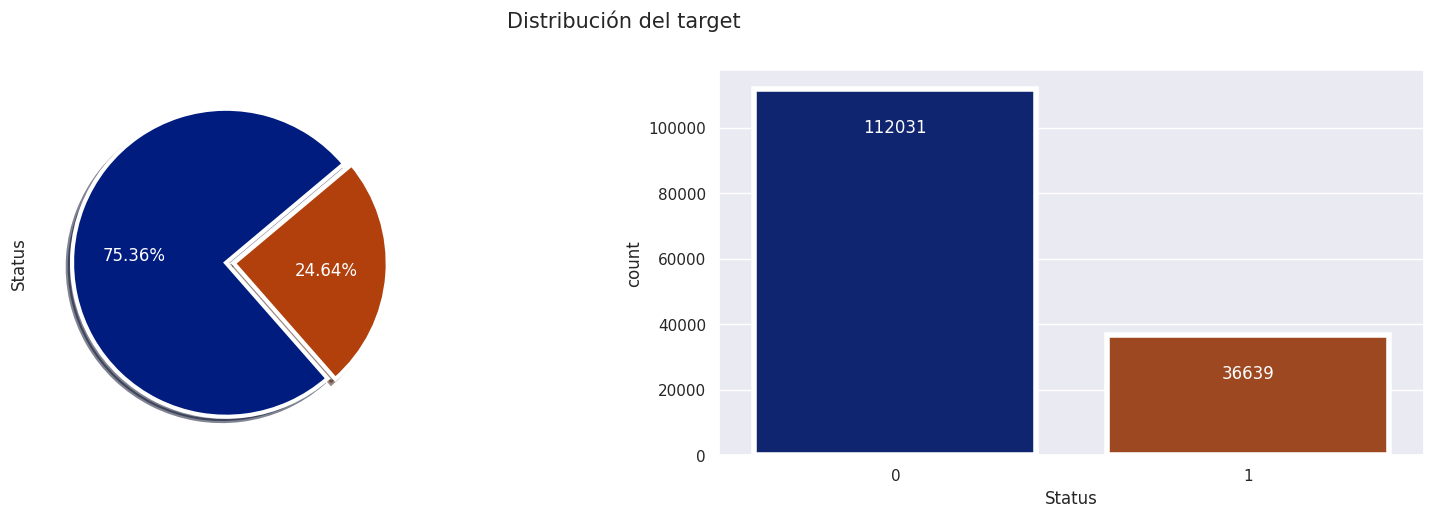

In [ ]:
#ANALISIS DEL TARGET
f,ax= plt.subplots(1,2,figsize=(20,5))
sns.countplot(data = data, x="Status", ax=ax[1],palette='dark',edgecolor='white', linewidth=4)
data.Status.value_counts().plot.pie(autopct='%.2f%%',explode=[0,0.05], ax=ax[0],colors=sns.color_palette('dark'),shadow = 'True',
        startangle = 40,
        textprops = {'color': 'White','fontsize':12},
        wedgeprops = {'linewidth':3,'edgecolor':'white'},
        rotatelabels = 'true')
ax[1].text(x=0,y=100000,s=data["Status"].value_counts()[0], color='white', va='center', ha='center')
ax[1].text(x=1,y=25000,s=data["Status"].value_counts()[1], color='white', va='center', ha='center')
f.suptitle('Distribución del target',y=0.98,ha='center',va='center',size=15, weight=150)
plt.show()

* Notamos una diferencia muy alta y por lo tanto sesgada
* Se tendría que extraer una proporción de los valores de "0" o usar una tecnica para aumentar el peso de la opción "1"

## Análisis Exploratorio

In [ ]:
def plot_categorical(data,height):
    '''
    This function plots categorical variables as bar charts wit
    h the % weight of each value on the bar
    '''
    cat_col = [col for col in data.columns if data[col].dtypes=='object']
    f,ax = plt.subplots(int(len(cat_col)/7),7, figsize=(33,20))
    for i in range(len(cat_col)):
        count = data[cat_col[i]].value_counts(normalize=True).reset_index()
        sns.barplot(data=count,x='index',y=cat_col[i], ax=ax[i//7,i%7], edgecolor='white',linewidth=2,palette='dark')
        ax[i//7,i%7].set_xlabel('')
        ax[i//7,i%7].set_ylabel('')
        ax[i//7,i%7].set_title(cat_col[i], size=15)
        ax[i//7,i%7].tick_params('x', labelrotation=30, size=12)
        for j in count.index:
            ax[i//7,i%7].text(x=j,y=count[cat_col[i]][j]+height, s=str(round(count[cat_col[i]][j],2))+'%',ha="center", va="center", color="black",size=13)
        f.suptitle('Column Distribution', y=0.98,ha='center',va='center',size=15, weight=150)
    plt.show()

In [ ]:
def plot_boxplot_histogram(data, feature, figsize=(10, 8), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(   # Se crean dos subplots, uno para boxplot y otro para el histograma
        nrows=2,
        sharex=True,  # comparten el eje x
        gridspec_kw={"height_ratios": (0.25, 0.75)}, # tamaño de los gráficos
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"  #showmeans indica que se mostrará la media
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins   #kde indica la linea de densidad
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Agrega ka nedia de la variable feature
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Agrega la mediana de la variable feature
    ax_box2.set_title(f"Boxplot e Histograma de {feature}", 
                      fontdict = {'fontsize': 15})
    plt.show()

In [ ]:
# selección de variables categóricas y numericas
df_categoricas = data.select_dtypes(include=['object']).columns.to_list()
df_numericas = data.select_dtypes(include=['float64', 'int64']).columns.to_list()
print("\033[1m" + 'Variables categoricas' + "\033[0m\n", df_categoricas)
print("\033[1m" + 'Variables numericas' + "\033[0m\n", df_numericas)

Variables categoricas
 ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']
Variables numericas
 ['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


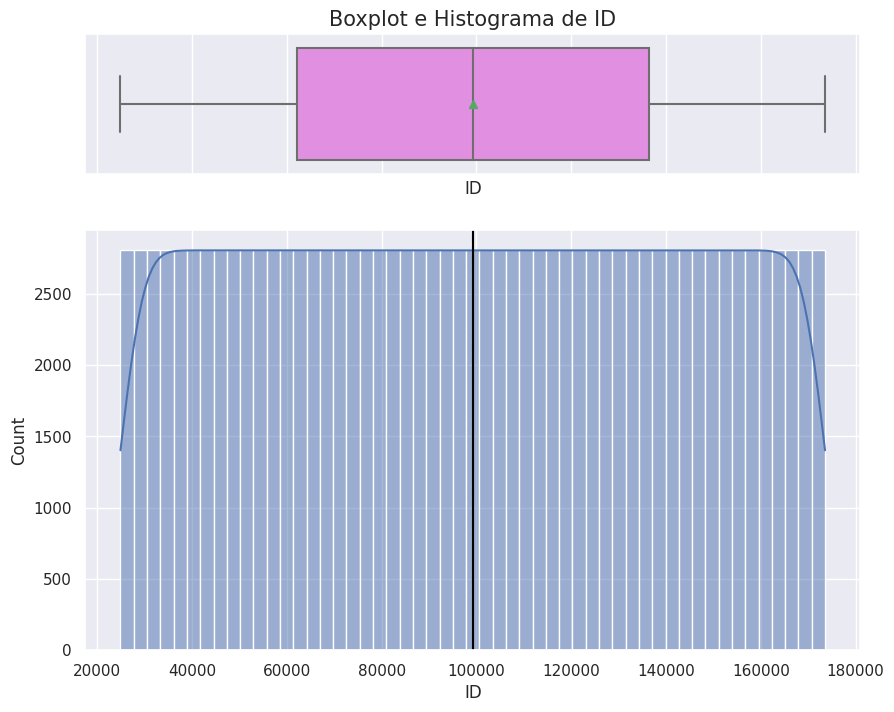

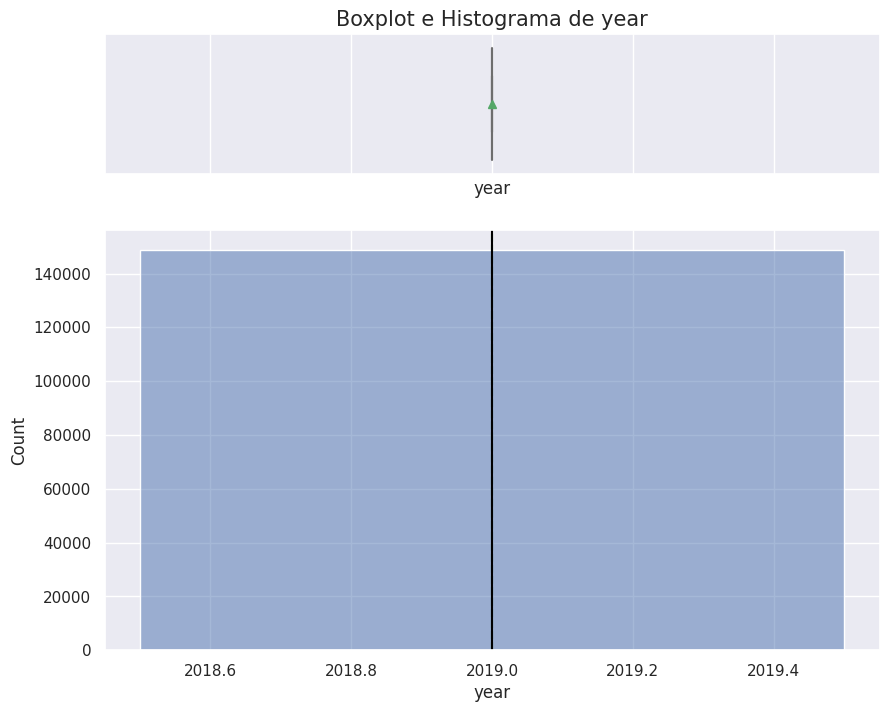

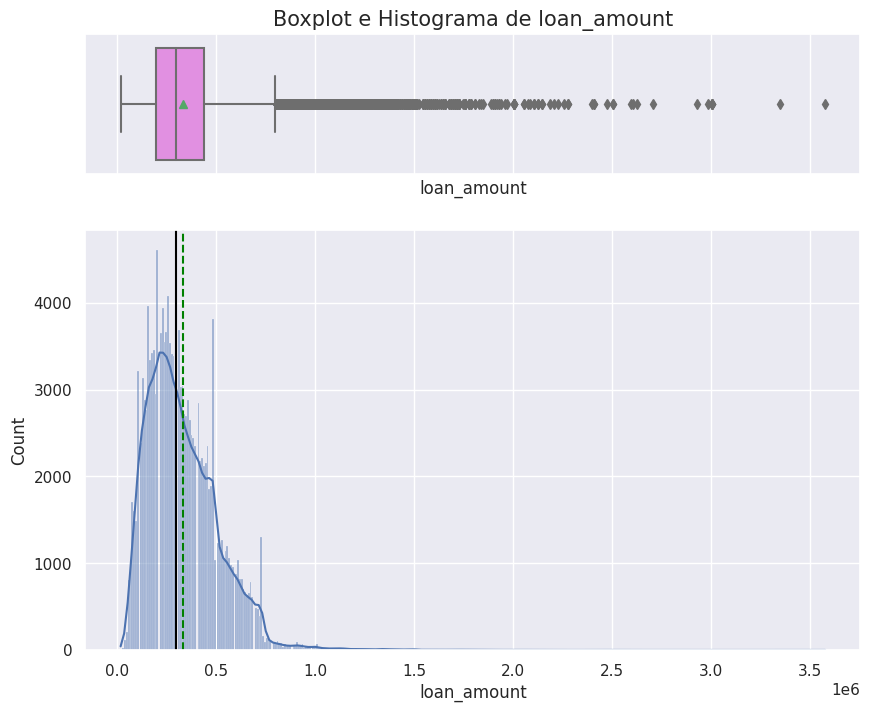

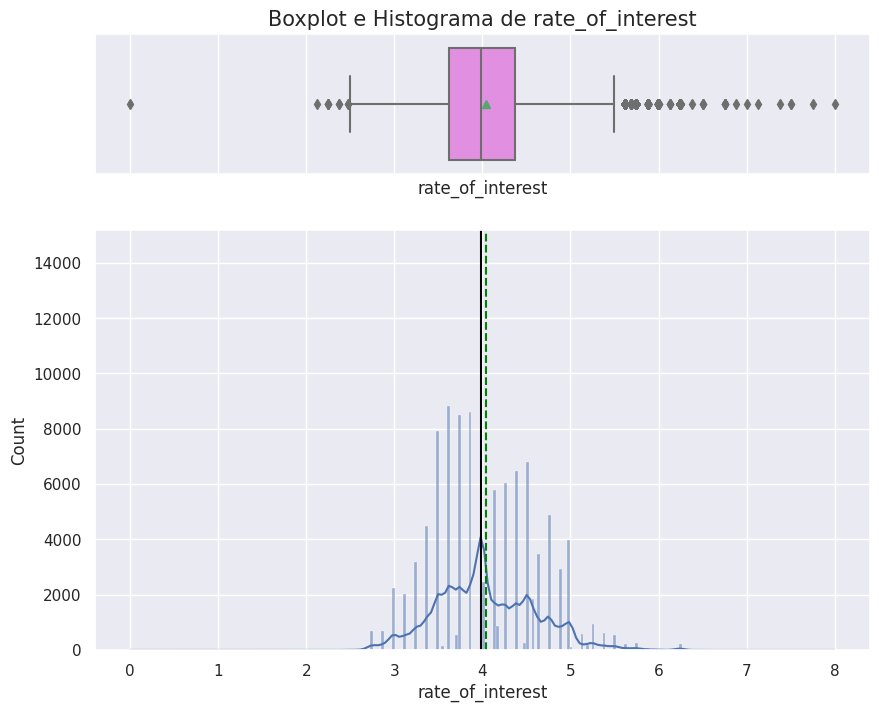

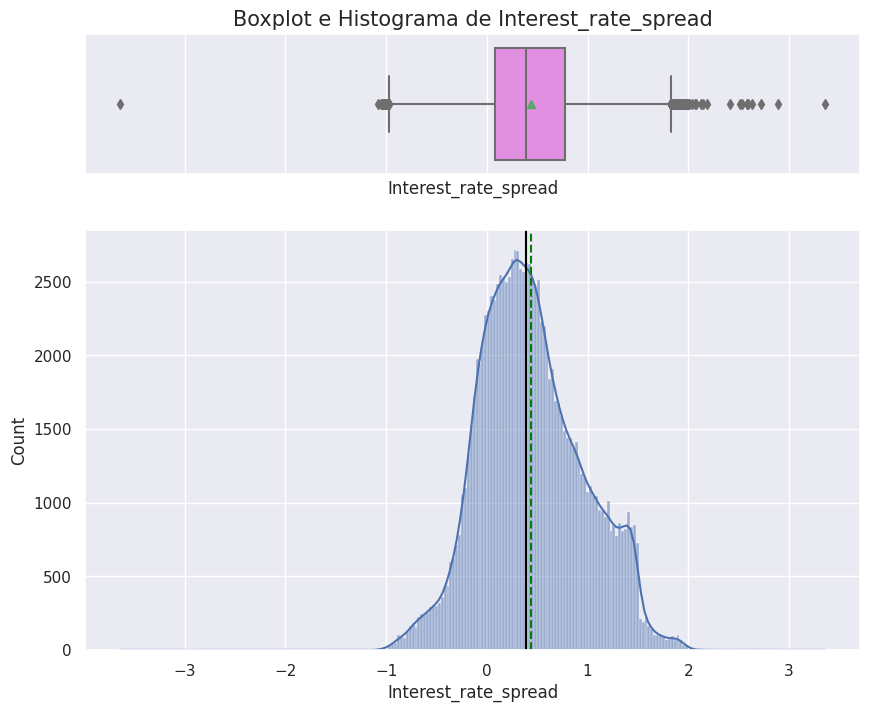

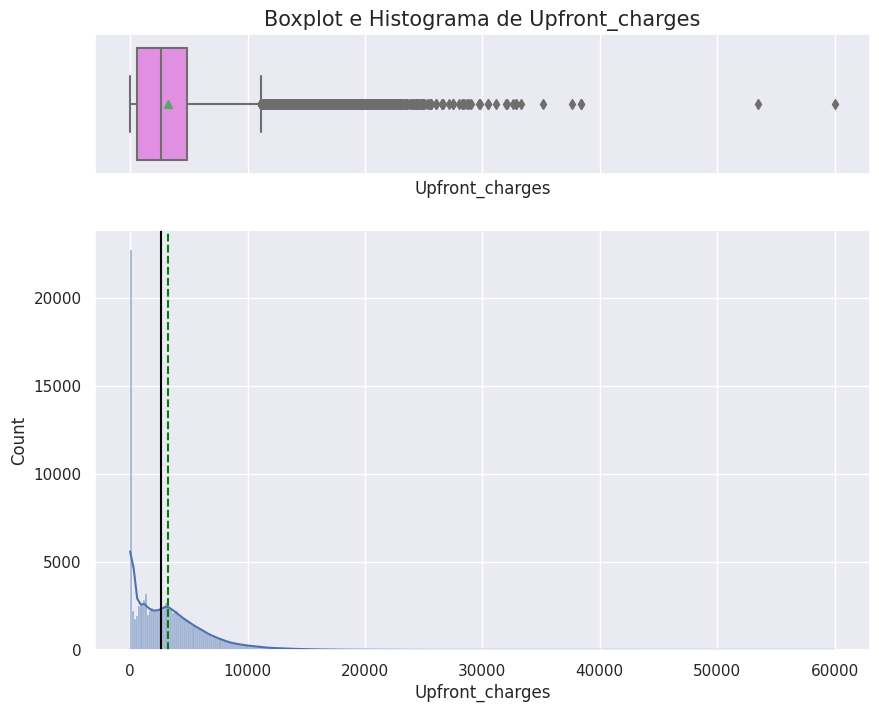

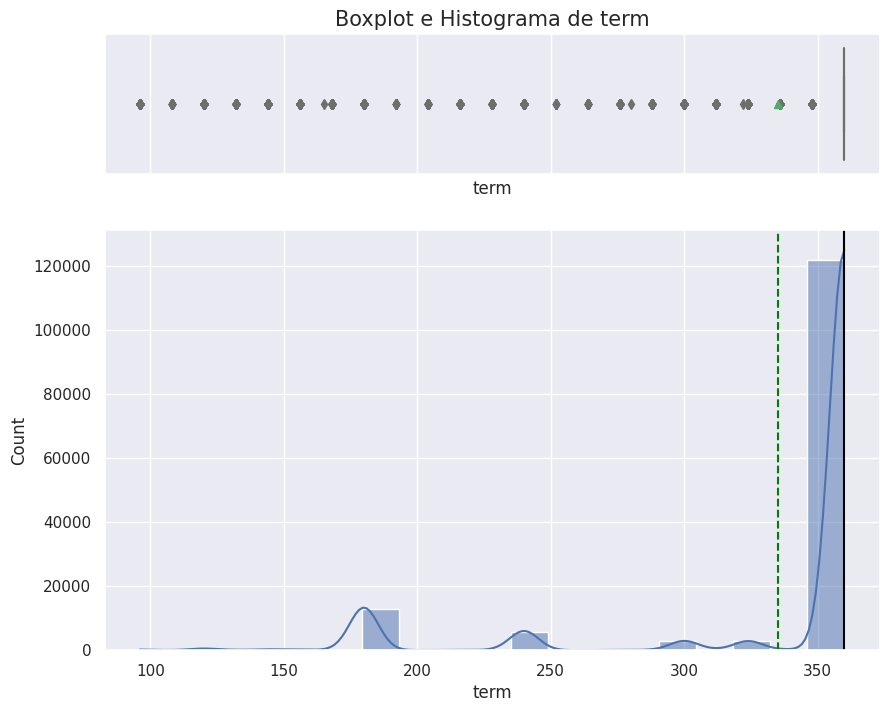

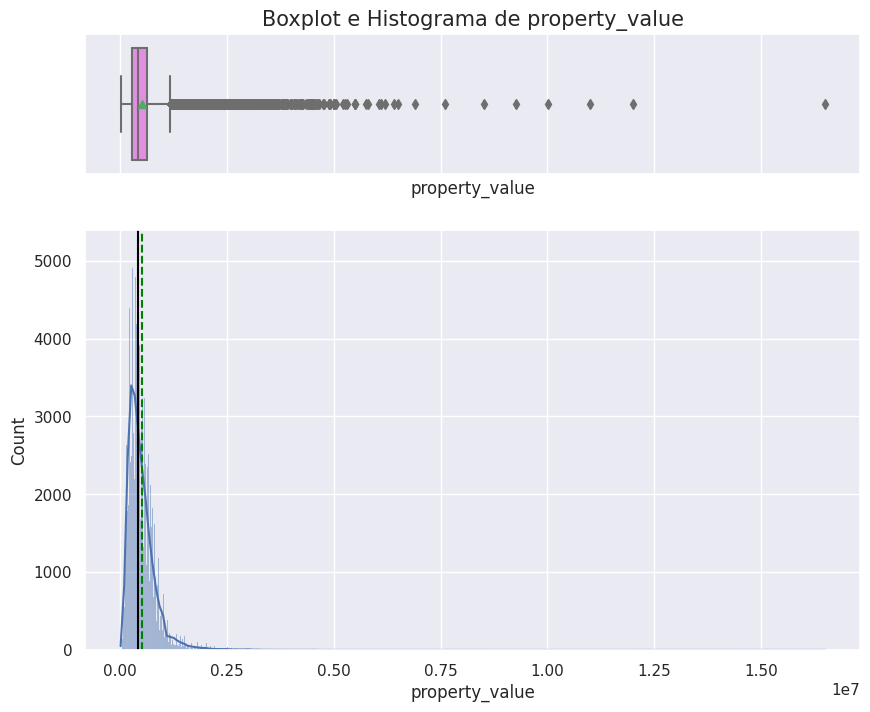

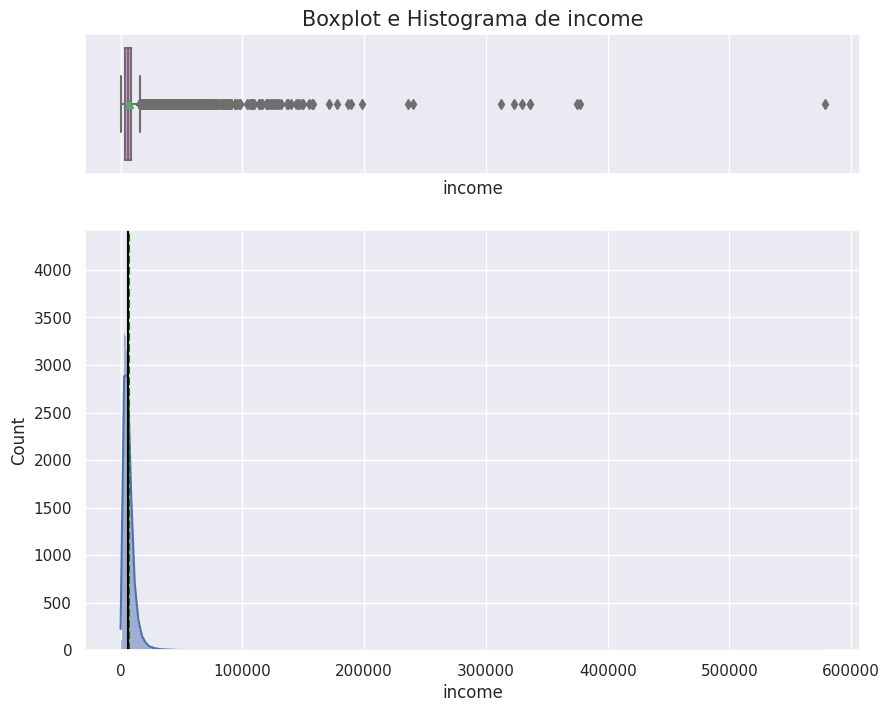

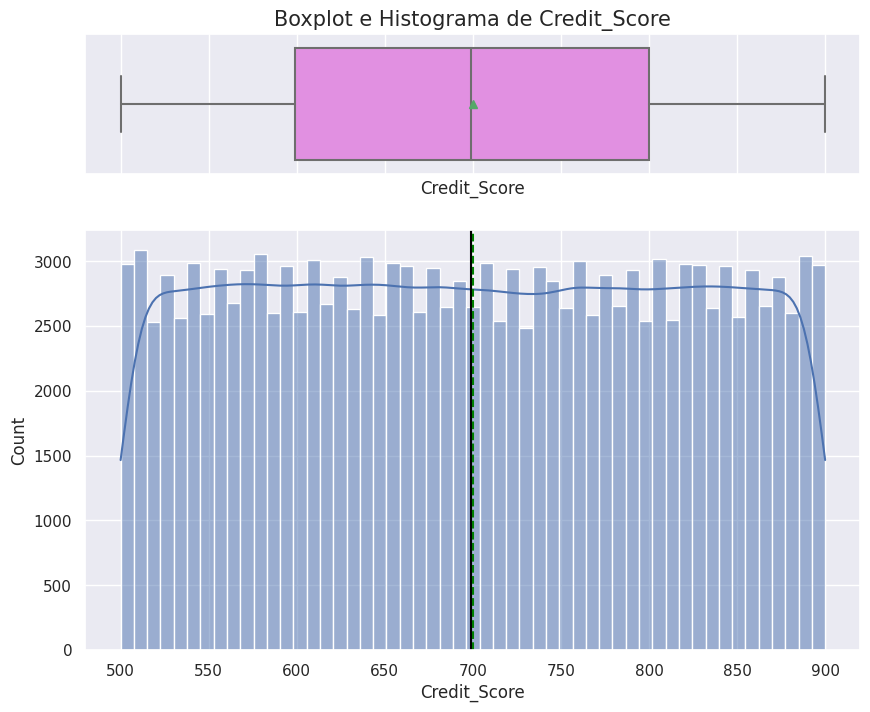

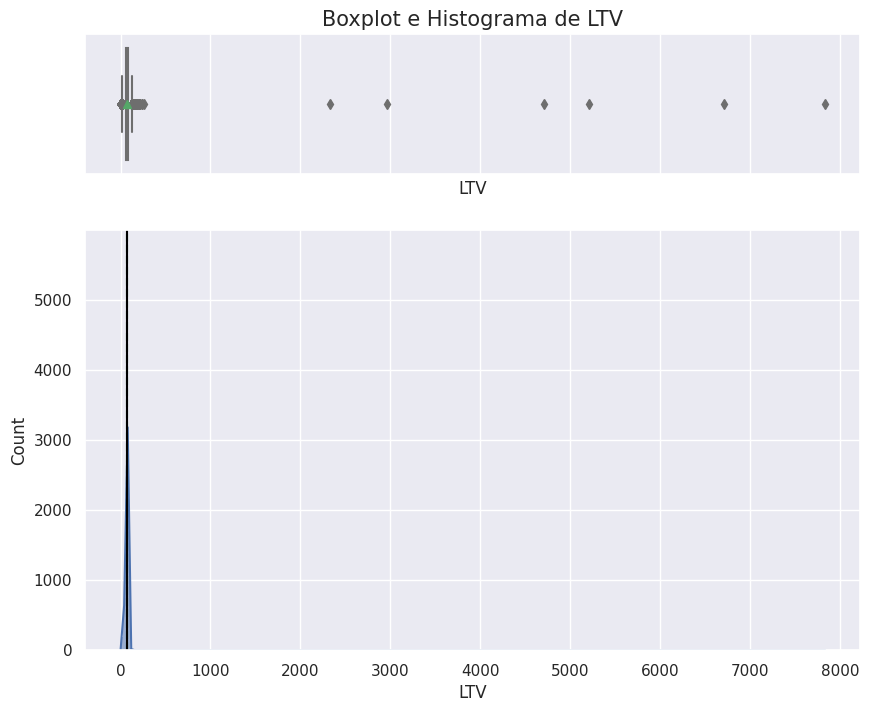

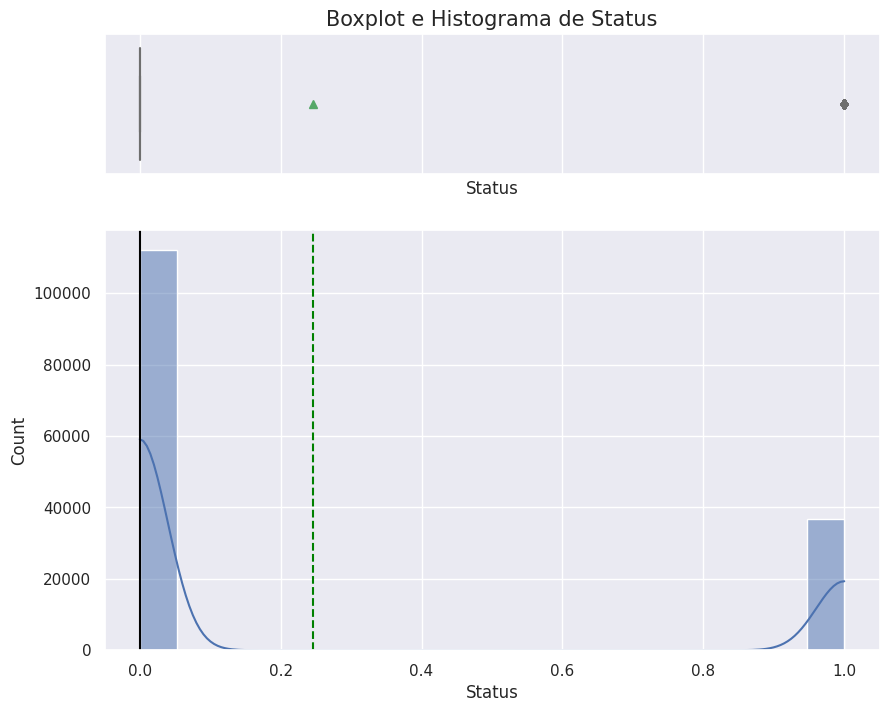

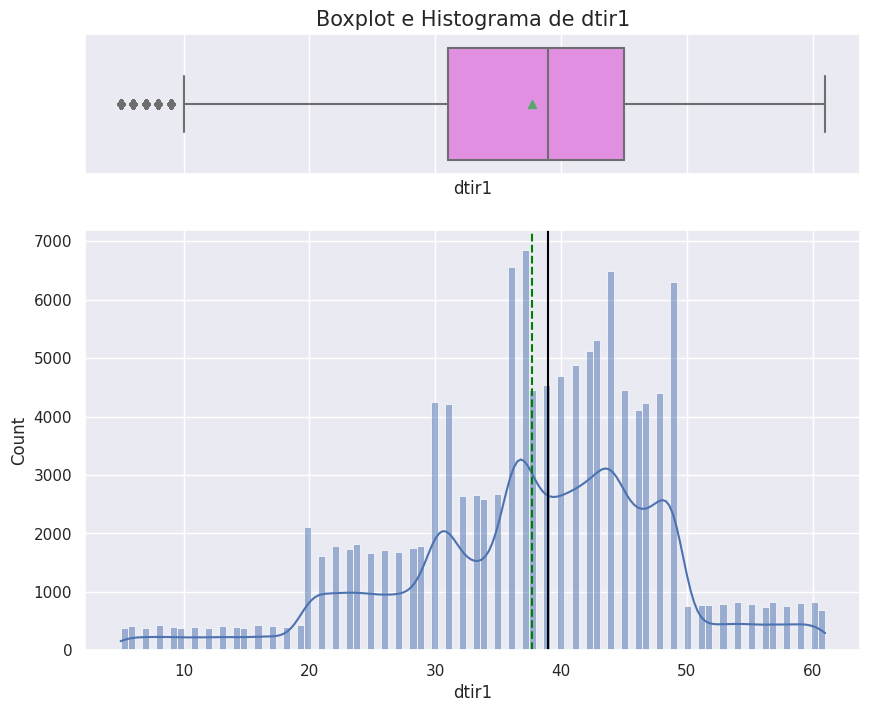

In [ ]:
# Mostrando los graficos de las variables numéricas
for i in df_numericas:
    plot_boxplot_histogram(data, i)

**Observaciones**
* La variable ID no nos da información relevante, por lo tanto se va a eliminar.
* La variable year posee unicamente un solo valor y no nos proporciona información al modelo, se va a eliminar.
* Observamos varias variables con una distribución con cola a la derecha.

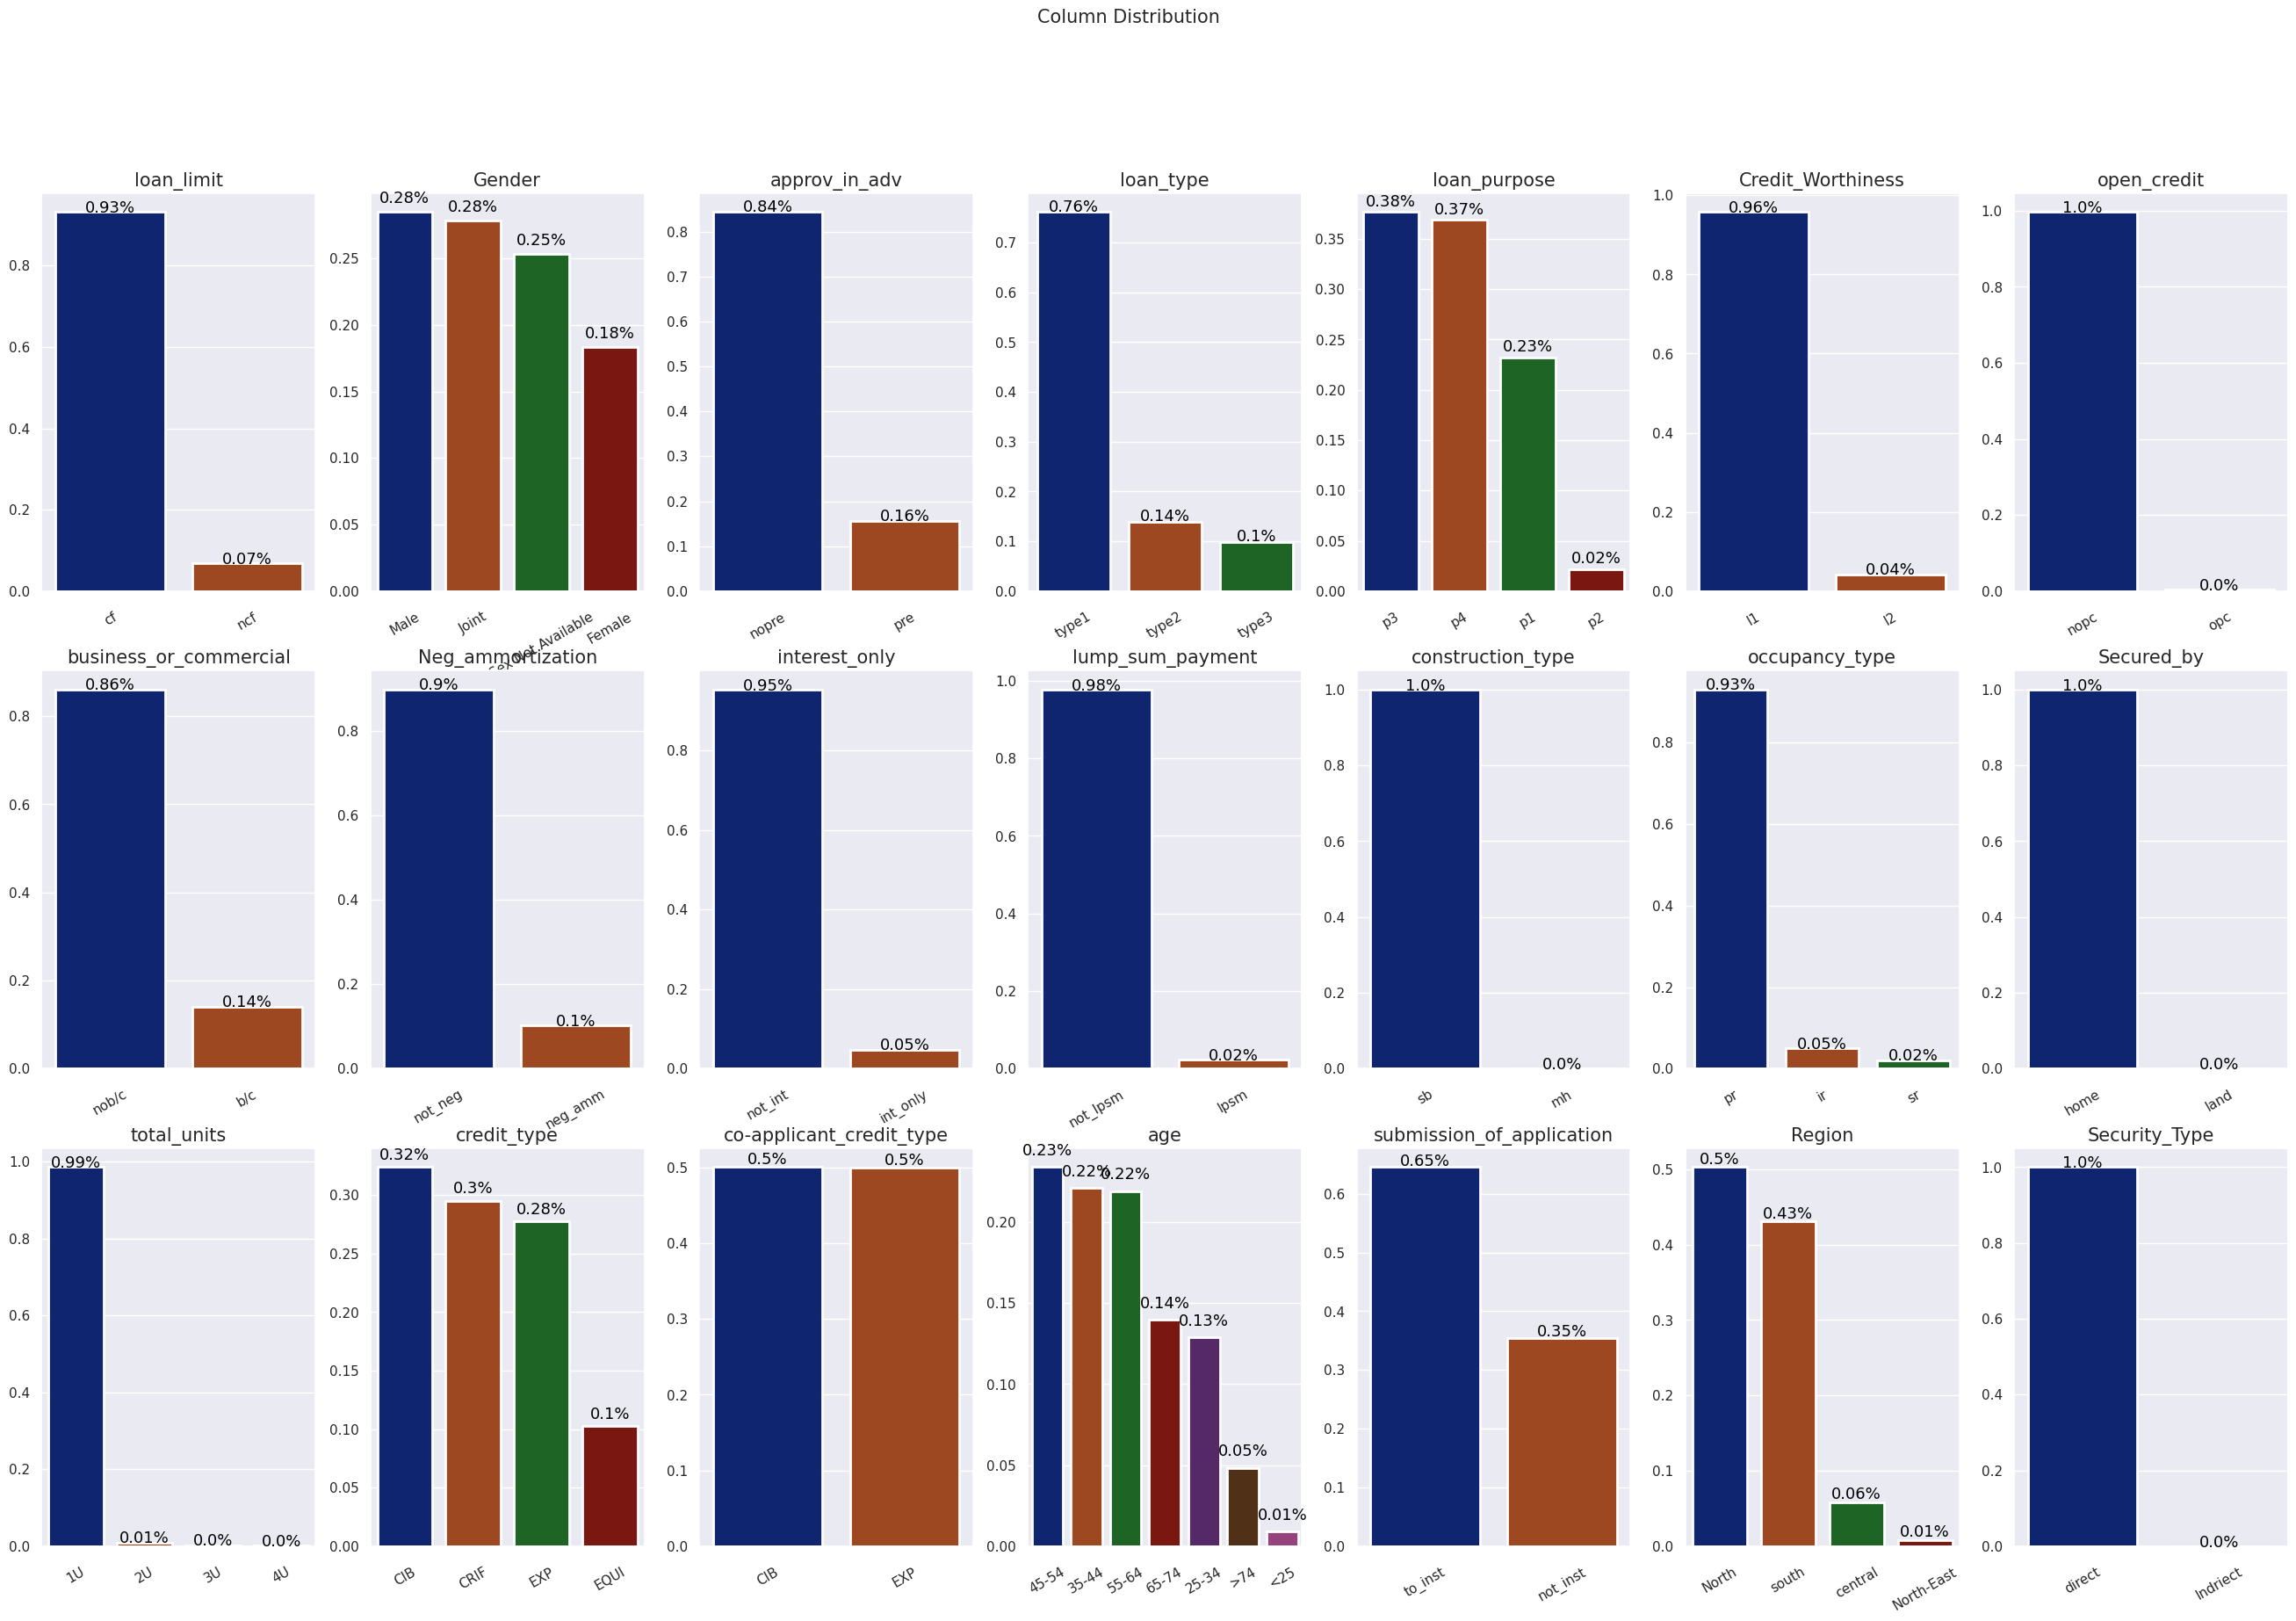

In [ ]:
# Mostrando los graficos de las variables categoricas
plot_categorical(data, 0.01)

Se observa mucho desvalance por parte de algunas variables que no aportarán nada al modelo y se procede a eliminar, tales como:
* loan_limit, Credit_Worthiness, open_credit, Neg_ammortization, interest_only, lump_sum_payment, construction_type, occupancy_type, Security_Type, total_units, Security_Type.

In [ ]:
df = data.copy()

# Eliminando las columnas numéricas que no nos proporcionan información
cols_delete_num = ["year","ID"]
df = df.drop(columns=cols_delete_num)

# Eliminando las columnas categóricas que no nos proporcionan información
cols_delete_cat = ["loan_limit","Credit_Worthiness","open_credit","Neg_ammortization", "interest_only", "lump_sum_payment", "construction_type", "occupancy_type", "Security_Type", "total_units", "Security_Type"]
df = df.drop(columns=cols_delete_cat)

df.columns.values

array(['Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term',
       'property_value', 'Secured_by', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Status', 'dtir1'],
      dtype=object)

In [ ]:
for i in df.columns.tolist():
    print(i)
    print(df.groupby('Status')[i].describe(), '\n')

Gender
         count unique    top   freq
Status                             
0       112031      4  Joint  33466
1        36639      4   Male  11091 

approv_in_adv
         count unique    top   freq
Status                             
0       111364      2  nopre  93058
1        36398      2  nopre  31563 

loan_type
         count unique    top   freq
Status                             
0       112031      3  type1  87398
1        36639      3  type1  25775 

loan_purpose
         count unique top   freq
Status                          
0       111932      4  p4  42209
1        36604      4  p3  13996 

business_or_commercial
         count unique    top   freq
Status                             
0       112031      2  nob/c  98441
1        36639      2  nob/c  29467 

loan_amount
           count           mean            std      min       25%       50%  \
Status                                                                        
0       112031.0  334990.774875  174916.57057

* Hay datos desbanlanceados con respecto a la categoria con una variación de más de 3 cifras.

In [ ]:
df=df.drop(['rate_of_interest',
'Interest_rate_spread',
'Upfront_charges'],axis=1)

### Análisis bivariado

In [ ]:
# Manera 1
# matriz de correlaciones
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
corr_matrix.reset_index(inplace = True)
corr_matrix.rename(columns = {'index': 'feature', 'Status': 'correl'}, inplace = True)
corr_matrix[['feature','correl']]

,feature,correl
0,loan_amount,-0.036825
1,term,-0.000240
2,property_value,-0.048864
3,income,-0.065119
4,Credit_Score,0.004004
5,LTV,0.038895
6,Status,1.000000
7,dtir1,0.078083


### Análisis estadístico

In [ ]:
# Resumen estadistico 
df_res = df.describe().transpose()
df_res.reset_index(inplace = True)        # quito los indices
df_res.rename(columns = {'index':'feature',   # cambio los nombres
                             '25%': 'Q1',
                             '50%': 'median',
                             '75%': 'Q3'}, inplace = True)
df_res

,feature,count,mean,std,min,Q1,median,Q3,max
0,loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3576500.00
1,term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,360.00
2,property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,16508000.00
3,income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,578580.00
4,Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,900.00
5,LTV,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7831.25
6,Status,148670.0,0.246445,0.430942,0.000000,0.00000,0.00000,0.000000,1.00
7,dtir1,124549.0,37.732932,10.545435,5.000000,31.00000,39.00000,45.000000,61.00


In [ ]:
# Porcentaje de valores nulos
df_res[['missing_rate']] = 1 - df_res[['count']]/data.shape[0]   
df_res.sort_values(by = 'missing_rate', ascending = False, inplace = True)  # ordeno del mayor a menor
df_res

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
7,dtir1,124549.0,37.732932,10.545435,5.000000,31.00000,39.00000,45.000000,61.00,0.162245
2,property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,16508000.00,0.101554
5,LTV,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7831.25,0.101554
3,income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,578580.00,0.061546
1,term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,360.00,0.000276
0,loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3576500.00,0.000000
4,Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,900.00,0.000000
6,Status,148670.0,0.246445,0.430942,0.000000,0.00000,0.00000,0.000000,1.00,0.000000


In [ ]:
# selección de variables categóricas y numericas
df_categoricas = df.select_dtypes(include=['object']).columns.to_list()
df_numericas = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
print("\033[1m" + 'Variables categoricas' + "\033[0m\n", df_categoricas)
print("\033[1m" + 'Variables numericas' + "\033[0m\n", df_numericas)

Variables categoricas
 ['Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'business_or_commercial', 'Secured_by', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region']
Variables numericas
 ['loan_amount', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


In [ ]:
#Calculando el gini univariado de todas las variables
ginisZero = [sklearn.metrics.roc_auc_score(df[target], df[col].fillna(0))*2-1 for col in df_numericas]


In [ ]:
# Calculando el Gini impurity
temp = df.copy()
temp['y'] = df[target]

ginisNan = [sklearn.metrics.roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in df_numericas]

In [ ]:
res_ginis = pd.DataFrame({'feature' : df_numericas,
                          'giniZero' : ginisZero,
                          'giniNan'  : ginisNan})

In [ ]:

df_res2 = pd.merge(df_res, res_ginis, on = 'feature', how='left')
df_res2.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,giniZero,giniNan
0,dtir1,124549.0,37.732932,10.545435,5.000000,31.00000,39.00000,45.000000,61.00,0.162245,-0.298336,0.149364
1,property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,16508000.00,0.101554,-0.511365,-0.168993
2,LTV,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7831.25,0.101554,-0.328816,0.141480
3,income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,578580.00,0.061546,-0.131333,-0.184553
4,term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,360.00,0.000276,-0.015529,-0.015362


## 2 Ingeniería de datos


In [ ]:
# Verificamos el cambio
for i in df_categoricas:
    print(i,'\n', df[i].value_counts(), '\n')

Gender 
 Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64 

approv_in_adv 
 nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64 

loan_type 
 type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64 

loan_purpose 
 p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64 

business_or_commercial 
 nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64 

Secured_by 
 home    148637
land        33
Name: Secured_by, dtype: int64 

credit_type 
 CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: credit_type, dtype: int64 

co-applicant_credit_type 
 CIB    74392
EXP    74278
Name: co-applicant_credit_type, dtype: int64 

age 
 45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64 

submission_of_application 
 to_inst     95814
not_inst    526

* No tengo muchas clases en mis variables categoricas, por ello podría usar one hot econding y hacer mi muestreo al final antes de realizar el modelo
* Hay algunas categorías que se podrían juntar y forman una nueva.

In [ ]:
# Aumentamos la cantidad, de las columnas desequilibradas, uniendo valores de bajo cantidad en columnas. 
# Intentaríamos equilibrar distribuciones altamente desequilibradas para "age, Region, total_units, occupancy_type y loan_type"

df['age'] = ['otros' if edad in ['>74', '<25'] else edad for edad in df['age']]
df['Region'] = ['otros' if region in ['central', 'North-East'] else region for region in df['Region']]
df['loan_type'] = [loan if loan=='type1' else 'otros' for loan in df['loan_type']]

## 3. Procesamiento de datos
* Solo nos encargaremos de la preparación básica de los datos antes de incorporarlo al modelo]

In [ ]:
df2 = df.copy()

In [ ]:
# Revisamos los missing en la variables categoricas
df2[df_categoricas].isnull().sum()

Gender                         0
approv_in_adv                908
loan_type                      0
loan_purpose                 134
business_or_commercial         0
Secured_by                     0
credit_type                    0
co-applicant_credit_type       0
age                          200
submission_of_application    200
Region                         0
dtype: int64

In [ ]:
# Reemplazando vacios en variables categoricas por el texto "missing"
for c in df_categoricas:
  df2[c] = df2[c].replace(np.nan,'missing')

In [ ]:
# Verificamos 
df2[df_categoricas].isnull().sum()

Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
business_or_commercial       0
Secured_by                   0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
dtype: int64

In [ ]:
# Revisamos los missing en la variables numericas
df2[df_numericas].isnull().sum()

loan_amount           0
term                 41
property_value    15098
income             9150
Credit_Score          0
LTV               15098
Status                0
dtir1             24121
dtype: int64

In [ ]:
# Imputando missings (Solo necesario en la libreria sklearn de python)
df2[[x + '_t' for x in df_numericas]] = df2[df_numericas].fillna(df[df_numericas].median())

### One hot encoding

In [ ]:
# Tratamiento de variables categóricas (Sólo aplica a python sklearn)

# One hot Encoding
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder = OneHotEncoder(sparse_output = False)
OneHotEncoder.fit(df2[df_categoricas])
df2[OneHotEncoder.get_feature_names_out(df_categoricas).tolist()] = OneHotEncoder.transform(df2[df_categoricas])

df2.head()

,Gender,approv_in_adv,loan_type,loan_purpose,business_or_commercial,loan_amount,term,property_value,Secured_by,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Status,dtir1,loan_amount_t,term_t,property_value_t,income_t,Credit_Score_t,LTV_t,Status_t,dtir1_t,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_missing,approv_in_adv_nopre,approv_in_adv_pre,loan_type_otros,loan_type_type1,loan_purpose_missing,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,business_or_commercial_b/c,business_or_commercial_nob/c,Secured_by_home,Secured_by_land,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_missing,age_otros,submission_of_application_missing,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_otros,Region_south
0,Sex Not Available,nopre,type1,p1,nob/c,116500,360.0,118000.0,home,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,1,45.0,116500,360.0,118000.0,1740.0,758,98.728814,1,45.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,Male,nopre,otros,p1,b/c,206500,360.0,NaN,home,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,1,NaN,206500,360.0,418000.0,4980.0,552,75.135870,1,39.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,Male,pre,type1,p1,nob/c,406500,360.0,508000.0,home,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,0,46.0,406500,360.0,508000.0,9480.0,834,80.019685,0,46.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,Male,nopre,type1,p4,nob/c,456500,360.0,658000.0,home,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,0,42.0,456500,360.0,658000.0,11880.0,587,69.376900,0,42.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Joint,pre,type1,p1,nob/c,696500,360.0,758000.0,home,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,0,39.0,696500,360.0,758000.0,10440.0,602,91.886544,0,39.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Indentificar las variables 

features = list(set(df2.columns.tolist()) - (set(df_categoricas + df_numericas + ['Status_t'])))
features

['loan_purpose_p1',
 'age_55-64',
 'property_value_t',
 'credit_type_EXP',
 'loan_purpose_p3',
 'credit_type_CIB',
 'Region_North',
 'submission_of_application_missing',
 'age_65-74',
 'term_t',
 'loan_purpose_p2',
 'submission_of_application_not_inst',
 'Secured_by_home',
 'dtir1_t',
 'Gender_Sex Not Available',
 'loan_type_otros',
 'submission_of_application_to_inst',
 'income_t',
 'loan_purpose_missing',
 'age_35-44',
 'Gender_Joint',
 'business_or_commercial_b/c',
 'age_25-34',
 'loan_amount_t',
 'credit_type_CRIF',
 'age_otros',
 'approv_in_adv_pre',
 'age_45-54',
 'age_missing',
 'LTV_t',
 'loan_purpose_p4',
 'Region_south',
 'credit_type_EQUI',
 'Credit_Score_t',
 'business_or_commercial_nob/c',
 'Gender_Female',
 'Region_otros',
 'Gender_Male',
 'approv_in_adv_missing',
 'approv_in_adv_nopre',
 'loan_type_type1',
 'co-applicant_credit_type_CIB',
 'co-applicant_credit_type_EXP',
 'Secured_by_land']

In [ ]:
# Verificamos si aún hay valores nulos
columns_with_nan = df2[features].isna().any()
columns_true = columns_with_nan.loc[columns_with_nan].index
columns_true

Index([], dtype='object')

In [ ]:
# Variables final
df3 = df2.copy()
print(len(df3[features].columns.tolist()),  "variables")

44 variables


In [ ]:
# Determinando matrices de datos

X = df3[features]
y = df3['Status_t']


In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

# Decision Tree

In [ ]:
# Cargar librerías 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5, 
                               min_samples_leaf = 0.05,
                               random_state = 22)

dtree = dtree.fit(X_train, y_train)
    
dtree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.05, random_state=22)

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [ ]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree

,metric,dTree_train,dTree_test
0,AUC,0.821874,0.821590
1,Gini,0.643748,0.643179
2,Accuracy,0.855615,0.858366
3,Precision,0.999906,1.000000
4,Recall,0.414162,0.425309
5,F1-score,0.585718,0.596796


### balanceo por pesos

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

In [ ]:
y_train.shape[0] - y_train.sum()

78422

In [ ]:
y_train.sum()

25647

In [ ]:
(y_train.shape[0] - y_train.sum())/y_train.sum()

3.057745545287948

In [ ]:
# Definiendo modelo


dtree_w = DecisionTreeClassifier(max_depth = 5, 
                               class_weight = {0: 1, 1: 3.057},
                               min_samples_leaf = 0.05,
                               random_state = 22)

dtree_w = dtree_w.fit(X_train, y_train)
    
dtree_w

DecisionTreeClassifier(class_weight={0: 1, 1: 3.057}, max_depth=5,
                       min_samples_leaf=0.05, random_state=22)

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtree_w.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree_w.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree_w.predict(X_train[features])
X_test['prediction']  = dtree_w.predict(X_test[features])

In [ ]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_w = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_w_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_w_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_w

,metric,dTree_w_train,dTree_w_test
0,AUC,0.822177,0.824760
1,Gini,0.644354,0.649520
2,Accuracy,0.804207,0.805901
3,Precision,0.594785,0.597838
4,Recall,0.644832,0.649017
5,F1-score,0.618798,0.622377


In [ ]:
temp = pd.merge(metricsDtree, metricsDtree_w, on = ['metric'], how= 'left')
temp

,metric,dTree_train,dTree_test,dTree_w_train,dTree_w_test
0,AUC,0.821874,0.821590,0.822177,0.824760
1,Gini,0.643748,0.643179,0.644354,0.649520
2,Accuracy,0.855615,0.858366,0.804207,0.805901
3,Precision,0.999906,1.000000,0.594785,0.597838
4,Recall,0.414162,0.425309,0.644832,0.649017
5,F1-score,0.585718,0.596796,0.618798,0.622377


**Observaciones**
* Seguimos observando valores muy altos, probaremos el crossvalidation

### Cross Validation

In [ ]:
# Cargar librerías para grid search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [ ]:
# Definiendo los parámetros a probar

parameters = {'max_depth': [x for x in range(2,12)],
            #   'class_weight' : [{0: 1, 1: 3.057}, 'balanced'],
              'min_samples_leaf' : np.array([0.01, 0.025, 0.05, 0.1, 0.2])}


In [ ]:
# Definiendo modelo

dtree_opt = DecisionTreeClassifier(random_state = 22)

In [ ]:
# Ejecutando grid search con 5 folds

GridSearch = GridSearchCV(dtree_opt, parameters, cv = 5, verbose = 5, n_jobs = 5,
                          refit = 'AUC',  # Especifica la metrica de evaluación que se utilizará
                          return_train_score = True) 

GridSearch.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=22), n_jobs=5,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': array([0.01 , 0.025, 0.05 , 0.1  , 0.2  ])},
             refit='AUC', return_train_score=True, verbose=5)

In [ ]:
GridSearch.best_params_

{'max_depth': 4, 'min_samples_leaf': 0.01}

In [ ]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(15,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

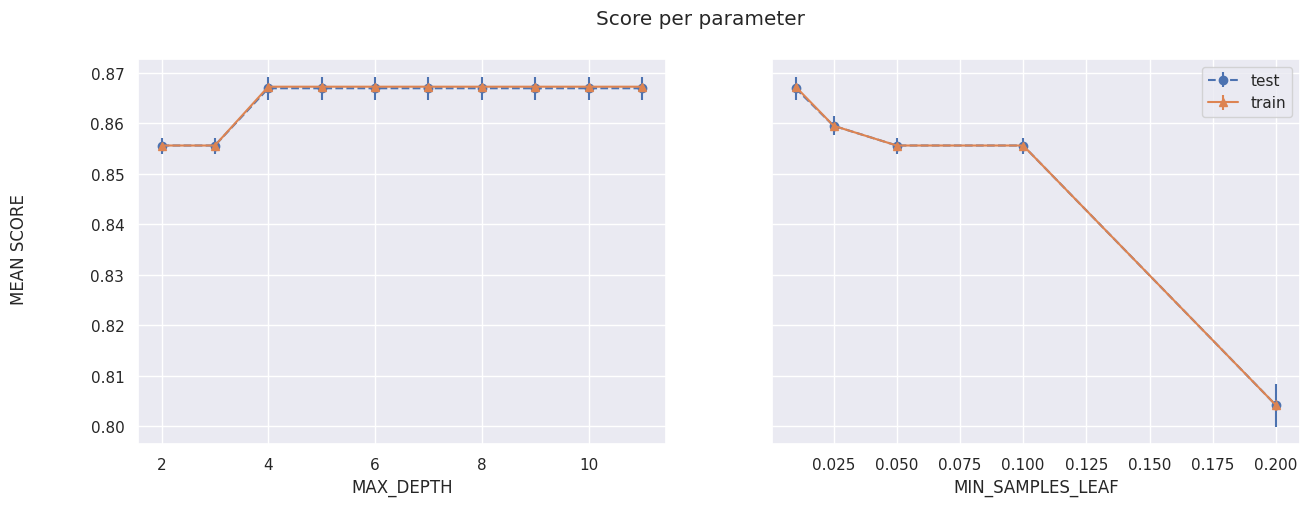

In [ ]:
# Calling Method 
plot_search_results(GridSearch)

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

In [ ]:
# Entrenamiento Óptimizado

dtreef = DecisionTreeClassifier(max_depth = 4, 
                               min_samples_leaf = 0.01,
                               random_state = 22)

dtreef = dtreef.fit(X_train, y_train)
    
dtreef

DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.01, random_state=22)

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtreef.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtreef.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtreef.predict(X_train[features])
X_test['prediction']  = dtreef.predict(X_test[features])

In [ ]:
#Resumen de todas las métricas del modelo

metricsDtreeOpt = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_grid_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_grid_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtreeOpt 

,metric,dTree_grid_train,dTree_grid_test
0,AUC,0.776650,0.777866
1,Gini,0.553299,0.555733
2,Accuracy,0.870125,0.868994
3,Precision,0.893378,0.879105
4,Recall,0.537100,0.543122
5,F1-score,0.670871,0.671428


In [ ]:
temp = pd.merge(temp, metricsDtreeOpt, on = ['metric'], how= 'left')
temp

,metric,dTree_train,dTree_test,dTree_w_train,dTree_w_test,dTree_grid_train,dTree_grid_test
0,AUC,0.821874,0.821590,0.822177,0.824760,0.776650,0.777866
1,Gini,0.643748,0.643179,0.644354,0.649520,0.553299,0.555733
2,Accuracy,0.855615,0.858366,0.804207,0.805901,0.870125,0.868994
3,Precision,0.999906,1.000000,0.594785,0.597838,0.893378,0.879105
4,Recall,0.414162,0.425309,0.644832,0.649017,0.537100,0.543122
5,F1-score,0.585718,0.596796,0.618798,0.622377,0.670871,0.671428


* Notamos que el mejor modelo de un arbol de desición es el que tomamos con la equilibrada de pesos en el target (dTree_w_train, dTree_w_test) con un 0.82 de AUC

### importancia del modelo

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

In [ ]:

importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : dtree.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
32,credit_type_EQUI,8.669977e-01
13,dtir1_t,7.053308e-02
17,income_t,2.609988e-02
16,submission_of_application_to_inst,1.924810e-02
29,LTV_t,1.712128e-02
33,Credit_Score_t,1.260620e-08


# Random Forest

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

In [ ]:
# Cargando librerías

from sklearn.ensemble import RandomForestClassifier
import time


In [ ]:
# Configurando modelo de random forest

rfc = RandomForestClassifier(n_estimators = 600,
                             max_depth = 8, 
                             min_samples_leaf = 0.05,
                             class_weight = {0: 1, 1: 3.057},
                             oob_score = True,
                             verbose = 1, 
                             n_jobs = 4,
                             random_state = 22)

#oob_score: Out of bagging score, es el desempeño del modelo en la muestra que se 
#queda fuera del proceso de extraccion de subespacios de la data
#es importante analizarlo por si el modelo deja fuera algunas caracteristicas importantes de la data

In [ ]:
start_time = time.time()
rfc = rfc.fit(X_train, y_train)
print("----%s seconds ---" % ((time.time() - start_time)))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   19.3s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   25.3s finished


----35.946850061416626 seconds ---


In [ ]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : rfc.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
32,credit_type_EQUI,0.239282
29,LTV_t,0.161703
2,property_value_t,0.152433
13,dtir1_t,0.130154
42,co-applicant_credit_type_EXP,0.051380
41,co-applicant_credit_type_CIB,0.046961
5,credit_type_CIB,0.035477
17,income_t,0.032488
11,submission_of_application_not_inst,0.029572
16,submission_of_application_to_inst,0.027131


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = rfc.predict_proba(X_train[features])[:,1]
X_test['probability']  = rfc.predict_proba(X_test[features])[:,1]

X_train['prediction'] = rfc.predict(X_train[features])
X_test['prediction']  = rfc.predict(X_test[features])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    3.0s finished
[

In [ ]:
#Resumen de todas las métricas del modelo

metricsRfc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'rfc_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'rfc_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

 
metricsRes = pd.merge(metricsDtree_w, metricsRfc, on = 'metric', how='left') 
metricsRes        

,metric,dTree_w_train,dTree_w_test,rfc_train,rfc_test
0,AUC,0.822177,0.824760,0.799896,0.800605
1,Gini,0.644354,0.649520,0.599792,0.601209
2,Accuracy,0.804207,0.805901,0.813893,0.814847
3,Precision,0.594785,0.597838,0.650438,0.651519
4,Recall,0.644832,0.649017,0.529263,0.534753
5,F1-score,0.618798,0.622377,0.583627,0.587389


* Notamos que

# XGBoost

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    train_size = 0.6,
                                                    random_state = 22)

X_watch, X_test, y_watch, y_test = train_test_split(X_test, y_test, 
                                                    stratify = y_test,
                                                    train_size = 0.5,
                                                    random_state = 22)


In [ ]:
# Cargando librerías

import numpy as np
import xgboost as xgb


In [ ]:
# Creando objetos de la clase DMatrix, para poder ser usada en xgboost
dtrain = xgb.DMatrix(X_train, label = y_train)
dwatch = xgb.DMatrix(X_watch, label = y_watch)
dtest  = xgb.DMatrix(X_test, label = y_test)

In [ ]:
# Definiendo parámetros

param = {'objetive' : 'binary_logistic',
         'max_depth' : 5,
         'learning_rate': 0.05,
         'min_data_leaf' : 0.05,
         'grow_policy' : 'lossguide',
         'seed' : 22}

param['eval_metric'] = 'auc'
num_round = 300         
evallist = [(dtrain,'train'), (dwatch,'watchlist')]

In [ ]:
import time

start_time = time.time()
xgBoost = xgb.train(param, dtrain, num_round, evallist, 
                    early_stopping_rounds = 5)
print("----%s seconds ---" % ((time.time() - start_time)))

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[05:19:43] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80655	watchlist-auc:0.80826
[1]	train-auc:0.80656	watchlist-auc:0.80825
[2]	train-auc:0.80913	watchlist-auc:0.81014
[3]	train-auc:0.81111	watchlist-auc:0.81298
[4]	train-auc:0.81115	watchlist-auc:0.81295
[5]	train-auc:0.81165	watchlist-auc:0.81366
[6]	train-auc:0.82012	watchlist-auc:0.82057
[7]	train-auc:0.82042	watchlist-auc:0.82081
[8]	train-auc:0.82156	watchlist-auc:0.82244
[9]	train-auc:0.83032	watchlist-auc:0.83256
[10]	train-auc:0.83115	watchlist-auc:0.83324
[11]	train-auc:0.83363	watchlist-auc:0.83633
[12]	train-auc:0.83399	watchlist-auc:0.83710
[13]	train-auc:0.83433	watchlist-auc:0.83742
[14]	train-auc:0.83628	watchlist-auc:0.83984
[15]	train-auc:0.83855	watchlist-auc:0.84216
[16]	train-auc:0.84023	watchlist-auc:0.84458
[17]	train-auc:0.84020	watchlist-auc:0.84464
[18]	train-auc:0.84111	watchlist-auc:0.84574
[19]	train-auc:0.84372	watchlist-auc:0.84799
[20]	tr

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

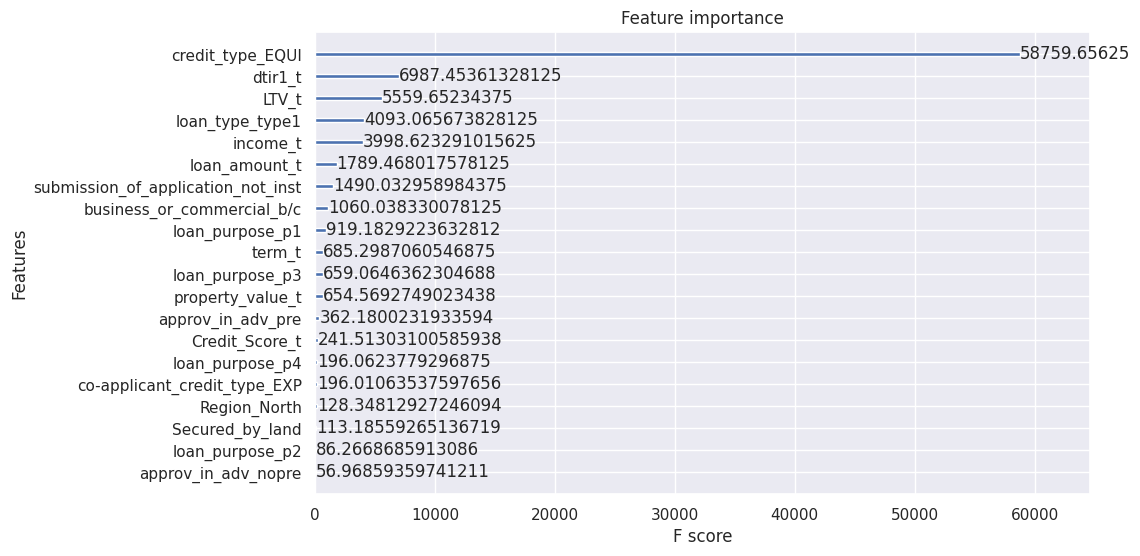

In [ ]:
xgb.plot_importance(xgBoost, max_num_features=20, importance_type = 'total_gain')

In [ ]:
importance = xgBoost.get_score(importance_type = 'total_gain')

In [ ]:
pdVarImp = pd.DataFrame({'Feature': list(importance.keys()),
                         'Importance' : list(importance.values())}).sort_values('Importance', ascending = False)

pdVarImp['C'] = np.arange(len(pdVarImp)) + 1
pdVarImp

,Feature,Importance,C
24,credit_type_EQUI,58759.656250,1
27,dtir1_t,6987.453613,2
19,LTV_t,5559.652344,3
3,loan_type_type1,4093.065674,4
32,income_t,3998.623291,5
30,loan_amount_t,1789.468018,6
20,submission_of_application_not_inst,1490.032959,7
18,business_or_commercial_b/c,1060.038330,8
34,loan_purpose_p1,919.182922,9
33,term_t,685.298706,10


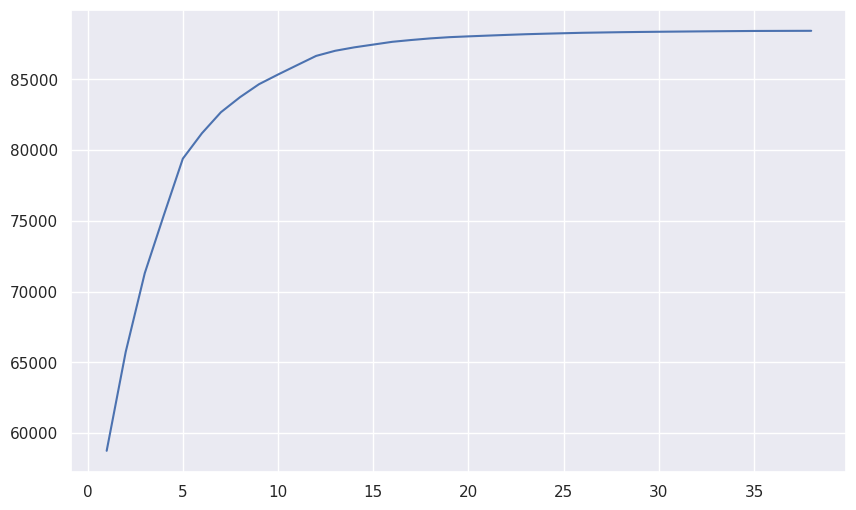

In [ ]:
plt.plot(pdVarImp.C,pdVarImp.Importance.cumsum(axis=0))

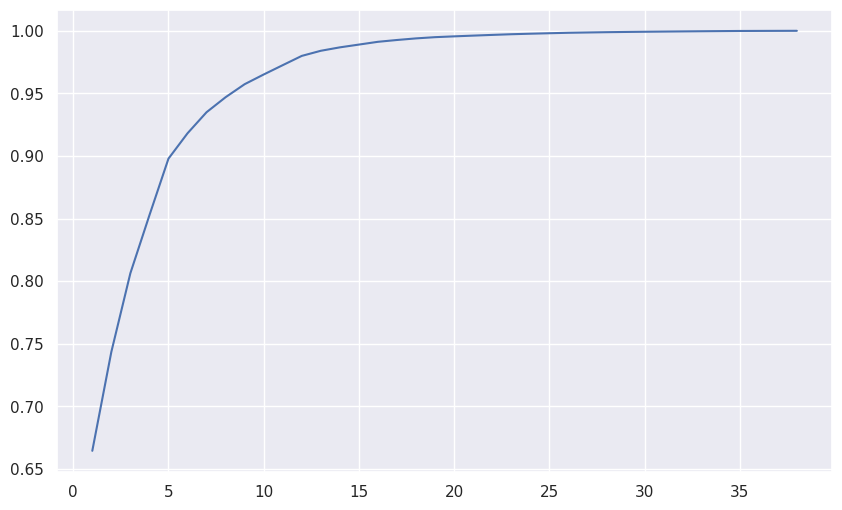

In [ ]:
pdVarImp['porc_gain'] = pdVarImp.Importance.apply(lambda x: x/pdVarImp.Importance.sum())
plt.plot(pdVarImp.C,pdVarImp.porc_gain.cumsum(axis=0))

In [ ]:
pdVarImp['porc_gain_acum'] = pdVarImp.porc_gain.cumsum(axis = 0)

In [ ]:
pdVarImp.transpose()

,24,27,19,3,32,30,20,18,34,33,23,10,4,8,28,14,9,17,12,37,0,6,2,29,11,7,16,26,5,13,22,35,25,15,21,31,36,1
Feature,credit_type_EQUI,dtir1_t,LTV_t,loan_type_type1,income_t,loan_amount_t,submission_of_application_not_inst,business_or_commercial_b/c,loan_purpose_p1,term_t,loan_purpose_p3,property_value_t,approv_in_adv_pre,Credit_Score_t,loan_purpose_p4,co-applicant_credit_type_EXP,Region_North,Secured_by_land,loan_purpose_p2,approv_in_adv_nopre,Gender_Male,credit_type_EXP,age_65-74,age_otros,age_25-34,age_55-64,credit_type_CRIF,age_35-44,age_45-54,Gender_Sex Not Available,loan_purpose_missing,credit_type_CIB,submission_of_application_to_inst,Region_otros,Gender_Female,Region_south,Gender_Joint,approv_in_adv_missing
Importance,58759.65625,6987.453613,5559.652344,4093.065674,3998.623291,1789.468018,1490.032959,1060.03833,919.182922,685.298706,659.064636,654.569275,362.180023,241.513031,196.062378,196.010635,128.348129,113.185593,86.266869,56.968594,52.540562,50.411907,47.496098,36.99498,33.285374,32.24118,21.38138,20.354229,16.241091,14.131978,12.619135,12.190054,11.508196,10.253397,9.439442,4.041914,3.896467,3.493857
C,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
porc_gain,0.664483,0.079018,0.062871,0.046286,0.045218,0.020236,0.01685,0.011987,0.010395,0.00775,0.007453,0.007402,0.004096,0.002731,0.002217,0.002217,0.001451,0.00128,0.000976,0.000644,0.000594,0.00057,0.000537,0.000418,0.000376,0.000365,0.000242,0.00023,0.000184,0.00016,0.000143,0.000138,0.00013,0.000116,0.000107,0.000046,0.000044,0.00004
porc_gain_acum,0.664483,0.7435,0.806372,0.852658,0.897876,0.918112,0.934963,0.94695,0.957345,0.965094,0.972547,0.979949,0.984045,0.986776,0.988993,0.99121,0.992661,0.993941,0.994917,0.995561,0.996155,0.996725,0.997263,0.997681,0.998057,0.998422,0.998664,0.998894,0.999078,0.999237,0.99938,0.999518,0.999648,0.999764,0.999871,0.999916,0.99996,1.0


In [ ]:
# Usando el modelo para predecir

X_train['probability']  = xgBoost.predict(xgb.DMatrix(X_train[features], label = y_train))
X_test['probability'] = xgBoost.predict(xgb.DMatrix(X_test[features], label = y_test))

X_train['prediction']  = X_train.probability.apply(lambda x: 1 if x > 0.5 else 0)
X_test['prediction'] = X_test.probability.apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsXGB = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'xgb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'xgb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsXGB
metricsRes = pd.merge(metricsRes, metricsXGB, on = 'metric', how='left') 
metricsRes       

,metric,dTree_w_train,dTree_w_test,rfc_train,rfc_test,xgb_train,xgb_test
0,AUC,0.822177,0.824760,0.801288,0.801692,0.888213,0.874409
1,Gini,0.644354,0.649520,0.602577,0.603384,0.776427,0.748818
2,Accuracy,0.804207,0.805901,0.820225,0.821775,0.887446,0.887469
3,Precision,0.594785,0.597838,0.676252,0.678601,0.957902,0.942444
4,Recall,0.644832,0.649017,0.518969,0.525928,0.568257,0.578739
5,F1-score,0.618798,0.622377,0.587262,0.592589,0.713339,0.717112


# Random Search

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 22)

In [ ]:
# setear valores iniciales

paramGrid = {'objetive' : ['binary_logistic'],
         'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
         'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
         'seed' : [123],
         'max_leaves' : [2, 4, 8],
         'min_data_leaf' : [0.01, 0.02, 0.05, 0.08, 0.1, 0.15, 0.2],
         'grow_policy' : ['lossguide'],
         'min_child_weight' : [1,2,3,4,5,6,7,8,9,10]}

param['eval_metric'] = 'auc'
num_round = 100

pdResults = pd.DataFrame()

In [ ]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest  = xgb.DMatrix(X_test, label = y_test)

In [ ]:
# Iniciar iteración de Hyperparámetros
import random

for i in range(100):
  print("****** Iteration : " + str(i))
  param = {}
  for paramName, paramValue in paramGrid.items():
    param[paramName] = random.choice(paramValue)
  param['eval_metric' ] = 'auc'
  evallist = [(dtrain,'train'),(dtest,'valid')]
  num_round = 10     

  bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval = 5)

  y_train_pred = bst.predict(dtrain)
  y_test_pred = bst.predict(dtest)

  giniTrain = ((roc_auc_score(y_train, y_train_pred) - 0.5)*200)
  giniTest =  ((roc_auc_score(y_test, y_test_pred) - 0.5)*200)

  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
                                             'paramName': list(param.keys()),
                                             'paramValue': list(param.values()),
                                             'giniTrain' : giniTrain,
                                             'giniTest' : giniTest}))

  pdResults.to_csv('HyperParamSearch.csv', index = False)

****** Iteration : 0
[05:23:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83218	valid-auc:0.83144
[5]	train-auc:0.83897	valid-auc:0.83781
[9]	train-auc:0.84228	valid-auc:0.84125
****** Iteration : 1
[05:24:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.74956	valid-auc:0.75133


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.74956	valid-auc:0.75133
[9]	train-auc:0.74956	valid-auc:0.75133
****** Iteration : 2
[05:24:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84293	valid-auc:0.84169
[5]	train-auc:0.85364	valid-auc:0.85211
[9]	train-auc:0.85977	valid-auc:0.85748
****** Iteration : 3
[05:24:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.74955	valid-auc:0.75133


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.75899	valid-auc:0.76055
[9]	train-auc:0.75979	valid-auc:0.76135
****** Iteration : 4
[05:24:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86363	valid-auc:0.85593
[5]	train-auc:0.87024	valid-auc:0.86190
[9]	train-auc:0.87457	valid-auc:0.86524


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


****** Iteration : 5
[05:24:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.85003	valid-auc:0.84785
[5]	train-auc:0.87088	valid-auc:0.86548
[9]	train-auc:0.88016	valid-auc:0.87051
****** Iteration : 6
[05:24:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84996	valid-auc:0.84743
[5]	train-auc:0.86412	valid-auc:0.86003
[9]	train-auc:0.86957	valid-auc:0.86400
****** Iteration : 7
[05:24:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84298	valid-auc:0.84148
[5]	train-auc:0.86754	valid-auc:0.86320
[9]	train-auc:0.87493	valid-auc:0.86814
****** Iteration : 8
[05:24:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85735	valid-auc:0.85389
[5]	train-auc:0.87610	valid-auc:0.86759
[9]	train-auc:0.88517	valid-auc:0.87223
****** Iteration : 9
[05:24:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84292	valid-auc:0.84169
[5]	train-auc:0.85966	valid-auc:0.85737
[9]	train-auc:0.86435	valid-auc:0.86119
****** Iteration : 10
[05:24:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.82584	valid-auc:0.82499


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.84165	valid-auc:0.84133
[9]	train-auc:0.84650	valid-auc:0.84586
****** Iteration : 11
[05:24:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86335	valid-auc:0.85694
[5]	train-auc:0.86510	valid-auc:0.85862
[9]	train-auc:0.86840	valid-auc:0.86150
****** Iteration : 12
[05:24:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86316	valid-auc:0.85713
[5]	train-auc:0.87502	valid-auc:0.86585
[9]	train-auc:0.88128	valid-auc:0.86929
****** Iteration : 13
[05:24:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80819	valid-auc:0.80617


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83591	valid-auc:0.83574
[9]	train-auc:0.84226	valid-auc:0.84179
****** Iteration : 14
[05:24:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76996	valid-auc:0.77193


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83089	valid-auc:0.83041
[9]	train-auc:0.83534	valid-auc:0.83429
****** Iteration : 15
[05:24:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84293	valid-auc:0.84169
[5]	train-auc:0.84604	valid-auc:0.84493
[9]	train-auc:0.84753	valid-auc:0.84620
****** Iteration : 16
[05:24:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85010	valid-auc:0.84758
[5]	train-auc:0.86410	valid-auc:0.86021
[9]	train-auc:0.86982	valid-auc:0.86437
****** Iteration : 17
[05:24:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83212	valid-auc:0.83134
[5]	train-auc:0.85713	valid-auc:0.85603
[9]	train-auc:0.86612	valid-auc:0.86266
****** Iteration : 18
[05:24:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83213	valid-auc:0.83157
[5]	train-auc:0.84298	valid-auc:0.84222
[9]	train-auc:0.85001	valid-auc:0.84924
****** Iteration : 19
[05:24:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84292	valid-auc:0.84149
[5]	train-auc:0.84603	valid-auc:0.84471
[9]	train-auc:0.84755	valid-auc:0.84595
****** Iteration : 20
[05:25:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85735	valid-auc:0.85380
[5]	train-auc:0.86983	valid-auc:0.86359
[9]	train-auc:0.87522	valid-auc:0.86700
****** Iteration : 21
[05:25:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76997	valid-auc:0.77193


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77004	valid-auc:0.77198
[9]	train-auc:0.77683	valid-auc:0.77764
****** Iteration : 22
[05:25:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76996	valid-auc:0.77193


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83530	valid-auc:0.83439
[9]	train-auc:0.84596	valid-auc:0.84655
****** Iteration : 23
[05:25:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83215	valid-auc:0.83149
[5]	train-auc:0.84300	valid-auc:0.84215
[9]	train-auc:0.85003	valid-auc:0.84915
****** Iteration : 24
[05:25:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83212	valid-auc:0.83134
[5]	train-auc:0.84915	valid-auc:0.84853
[9]	train-auc:0.85552	valid-auc:0.85429
****** Iteration : 25
[05:25:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86770	valid-auc:0.85782
[5]	train-auc:0.86995	valid-auc:0.85972
[9]	train-auc:0.87052	valid-auc:0.85998
****** Iteration : 26
[05:25:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85737	valid-auc:0.85392
[5]	train-auc:0.86549	valid-auc:0.86056
[9]	train-auc:0.86931	valid-auc:0.86337
****** Iteration : 27
[05:25:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84305	valid-auc:0.84163
[5]	train-auc:0.85971	valid-auc:0.85748
[9]	train-auc:0.86501	valid-auc:0.86208
****** Iteration : 28
[05:25:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83213	valid-auc:0.83157
[5]	train-auc:0.83889	valid-auc:0.83786
[9]	train-auc:0.84222	valid-auc:0.84140
****** Iteration : 29
[05:25:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80819	valid-auc:0.80617


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81497	valid-auc:0.81269
[9]	train-auc:0.83232	valid-auc:0.83174
****** Iteration : 30
[05:25:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.74955	valid-auc:0.75133


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.75899	valid-auc:0.76055
[9]	train-auc:0.75979	valid-auc:0.76135
****** Iteration : 31
[05:25:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85032	valid-auc:0.84762
[5]	train-auc:0.85989	valid-auc:0.85628
[9]	train-auc:0.86319	valid-auc:0.85928
****** Iteration : 32
[05:25:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84297	valid-auc:0.84162
[5]	train-auc:0.84610	valid-auc:0.84480
[9]	train-auc:0.84762	valid-auc:0.84614
****** Iteration : 33
[05:25:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80819	valid-auc:0.80617


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83591	valid-auc:0.83574
[9]	train-auc:0.84226	valid-auc:0.84179
****** Iteration : 34
[05:25:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80819	valid-auc:0.80617


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.84305	valid-auc:0.84274
[9]	train-auc:0.85639	valid-auc:0.85557
****** Iteration : 35
[05:25:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85017	valid-auc:0.84777
[5]	train-auc:0.85205	valid-auc:0.84950
[9]	train-auc:0.85233	valid-auc:0.84945
****** Iteration : 36
[05:25:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86851	valid-auc:0.85607
[5]	train-auc:0.87957	valid-auc:0.86579
[9]	train-auc:0.88789	valid-auc:0.86959
****** Iteration : 37
[05:25:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.82584	valid-auc:0.82499


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.84165	valid-auc:0.84133
[9]	train-auc:0.84650	valid-auc:0.84586
****** Iteration : 38
[05:25:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86802	valid-auc:0.85734
[5]	train-auc:0.87432	valid-auc:0.86266
[9]	train-auc:0.87843	valid-auc:0.86565
****** Iteration : 39
[05:25:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86829	valid-auc:0.85687
[5]	train-auc:0.87493	valid-auc:0.86306
[9]	train-auc:0.87890	valid-auc:0.86574
****** Iteration : 40
[05:26:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.76091	valid-auc:0.76235
[5]	train-auc:0.76091	valid-auc:0.76235
[9]	train-auc:0.76914	valid-auc:0.77099
****** Iteration : 41
[05:26:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76996	valid-auc:0.77193


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77684	valid-auc:0.77765
[9]	train-auc:0.77904	valid-auc:0.78015
****** Iteration : 42
[05:26:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85736	valid-auc:0.85383
[5]	train-auc:0.85854	valid-auc:0.85495
[9]	train-auc:0.86032	valid-auc:0.85630
****** Iteration : 43
[05:26:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86752	valid-auc:0.85767
[5]	train-auc:0.87058	valid-auc:0.86006
[9]	train-auc:0.87281	valid-auc:0.86198
****** Iteration : 44
[05:26:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.74955	valid-auc:0.75133


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.75899	valid-auc:0.76055
[9]	train-auc:0.75979	valid-auc:0.76135
****** Iteration : 45
[05:26:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80819	valid-auc:0.80617


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81209	valid-auc:0.80943
[9]	train-auc:0.81495	valid-auc:0.81282
****** Iteration : 46
[05:26:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.74955	valid-auc:0.75133


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.75899	valid-auc:0.76055
[9]	train-auc:0.75979	valid-auc:0.76135
****** Iteration : 47
[05:26:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85735	valid-auc:0.85389
[5]	train-auc:0.86523	valid-auc:0.86017
[9]	train-auc:0.86930	valid-auc:0.86329
****** Iteration : 48
[05:26:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76090	valid-auc:0.76235


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.82417	valid-auc:0.82163
[9]	train-auc:0.83623	valid-auc:0.83529
****** Iteration : 49
[05:26:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83213	valid-auc:0.83157
[5]	train-auc:0.84298	valid-auc:0.84222
[9]	train-auc:0.85001	valid-auc:0.84924
****** Iteration : 50
[05:26:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.82584	valid-auc:0.82498
[5]	train-auc:0.84165	valid-auc:0.84133
[9]	train-auc:0.84650	valid-auc:0.84586
****** Iteration : 51
[05:26:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80819	valid-auc:0.80617


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.84304	valid-auc:0.84274
[9]	train-auc:0.85641	valid-auc:0.85557
****** Iteration : 52
[05:26:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85756	valid-auc:0.85398
[5]	train-auc:0.86554	valid-auc:0.86045
[9]	train-auc:0.86883	valid-auc:0.86285
****** Iteration : 53
[05:26:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.82584	valid-auc:0.82498


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.82928	valid-auc:0.82840
[9]	train-auc:0.83183	valid-auc:0.83120
****** Iteration : 54
[05:26:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76996	valid-auc:0.77193


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83530	valid-auc:0.83439
[9]	train-auc:0.84596	valid-auc:0.84655
****** Iteration : 55
[05:26:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85003	valid-auc:0.84785
[5]	train-auc:0.85188	valid-auc:0.84956
[9]	train-auc:0.85217	valid-auc:0.84945
****** Iteration : 56
[05:26:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85010	valid-auc:0.84779
[5]	train-auc:0.86416	valid-auc:0.86024
[9]	train-auc:0.86985	valid-auc:0.86440
****** Iteration : 57
[05:26:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84996	valid-auc:0.84766
[5]	train-auc:0.86413	valid-auc:0.86025
[9]	train-auc:0.86915	valid-auc:0.86392
****** Iteration : 58
[05:26:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83213	valid-auc:0.83157
[5]	train-auc:0.83888	valid-auc:0.83785
[9]	train-auc:0.84222	valid-auc:0.84140
****** Iteration : 59
[05:26:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84305	valid-auc:0.84163
[5]	train-auc:0.85971	valid-auc:0.85748
[9]	train-auc:0.86501	valid-auc:0.86208
****** Iteration : 60
[05:26:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83213	valid-auc:0.83157
[5]	train-auc:0.84916	valid-auc:0.84857
[9]	train-auc:0.85557	valid-auc:0.85428
****** Iteration : 61
[05:26:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85762	valid-auc:0.85375
[5]	train-auc:0.86570	valid-auc:0.86049
[9]	train-auc:0.86843	valid-auc:0.86273
****** Iteration : 62
[05:26:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.82584	valid-auc:0.82498


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.84165	valid-auc:0.84133
[9]	train-auc:0.84650	valid-auc:0.84586
****** Iteration : 63
[05:27:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84292	valid-auc:0.84168
[5]	train-auc:0.85373	valid-auc:0.85198
[9]	train-auc:0.85978	valid-auc:0.85747
****** Iteration : 64
[05:27:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80819	valid-auc:0.80617


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83591	valid-auc:0.83574
[9]	train-auc:0.84226	valid-auc:0.84179


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


****** Iteration : 65
[05:27:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.85767	valid-auc:0.85334
[5]	train-auc:0.86069	valid-auc:0.85605
[9]	train-auc:0.86387	valid-auc:0.85881


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


****** Iteration : 66
[05:27:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76996	valid-auc:0.77193
[5]	train-auc:0.77684	valid-auc:0.77765
[9]	train-auc:0.77904	valid-auc:0.78015
****** Iteration : 67
[05:27:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.84298	valid-auc:0.84148
[5]	train-auc:0.85968	valid-auc:0.85736
[9]	train-auc:0.86485	valid-auc:0.86189
****** Iteration : 68
[05:27:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85762	valid-auc:0.85375
[5]	train-auc:0.86062	valid-auc:0.85639
[9]	train-auc:0.86364	valid-auc:0.85902
****** Iteration : 69
[05:27:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85026	valid-auc:0.84770
[5]	train-auc:0.86438	valid-auc:0.86045
[9]	train-auc:0.86977	valid-auc:0.86441
****** Iteration : 70
[05:27:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76996	valid-auc:0.77193


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83089	valid-auc:0.83041
[9]	train-auc:0.83534	valid-auc:0.83429
****** Iteration : 71
[05:27:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.74955	valid-auc:0.75133


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.75899	valid-auc:0.76055
[9]	train-auc:0.75979	valid-auc:0.76135
****** Iteration : 72
[05:27:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76996	valid-auc:0.77193


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83089	valid-auc:0.83041
[9]	train-auc:0.83534	valid-auc:0.83429
****** Iteration : 73
[05:27:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.74955	valid-auc:0.75133


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77482	valid-auc:0.77566
[9]	train-auc:0.81929	valid-auc:0.81742
****** Iteration : 74
[05:27:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76996	valid-auc:0.77193


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77003	valid-auc:0.77198
[9]	train-auc:0.77683	valid-auc:0.77764
****** Iteration : 75
[05:27:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86351	valid-auc:0.85693
[5]	train-auc:0.87026	valid-auc:0.86268
[9]	train-auc:0.87427	valid-auc:0.86528
****** Iteration : 76
[05:27:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86364	valid-auc:0.85680
[5]	train-auc:0.88349	valid-auc:0.86932
[9]	train-auc:0.89253	valid-auc:0.87301
****** Iteration : 77
[05:27:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.82584	valid-auc:0.82499


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.82610	valid-auc:0.82524
[9]	train-auc:0.82907	valid-auc:0.82818
****** Iteration : 78
[05:27:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86791	valid-auc:0.85725
[5]	train-auc:0.87025	valid-auc:0.85946
[9]	train-auc:0.87075	valid-auc:0.85984
****** Iteration : 79
[05:27:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80819	valid-auc:0.80617


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.81209	valid-auc:0.80943
[9]	train-auc:0.81495	valid-auc:0.81282
****** Iteration : 80
[05:27:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83215	valid-auc:0.83149
[5]	train-auc:0.84921	valid-auc:0.84851
[9]	train-auc:0.85564	valid-auc:0.85369
****** Iteration : 81
[05:28:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76090	valid-auc:0.76235


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77865	valid-auc:0.77975
[9]	train-auc:0.77866	valid-auc:0.77976
****** Iteration : 82
[05:28:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76996	valid-auc:0.77193


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83530	valid-auc:0.83439
[9]	train-auc:0.84596	valid-auc:0.84655
****** Iteration : 83
[05:28:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83215	valid-auc:0.83149
[5]	train-auc:0.83544	valid-auc:0.83513
[9]	train-auc:0.83727	valid-auc:0.83624
****** Iteration : 84
[05:28:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85736	valid-auc:0.85383
[5]	train-auc:0.86032	valid-auc:0.85636
[9]	train-auc:0.86351	valid-auc:0.85921
****** Iteration : 85
[05:28:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76996	valid-auc:0.77193


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83530	valid-auc:0.83439
[9]	train-auc:0.84596	valid-auc:0.84655
****** Iteration : 86
[05:28:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76996	valid-auc:0.77193


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77906	valid-auc:0.78023
[9]	train-auc:0.83231	valid-auc:0.83205
****** Iteration : 87
[05:28:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.76996	valid-auc:0.77193
[5]	train-auc:0.83530	valid-auc:0.83439
[9]	train-auc:0.84596	valid-auc:0.84655
****** Iteration : 88
[05:28:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.82584	valid-auc:0.82498


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.83297	valid-auc:0.83255
[9]	train-auc:0.84041	valid-auc:0.83954
****** Iteration : 89
[05:28:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.80819	valid-auc:0.80617


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.80819	valid-auc:0.80617
[9]	train-auc:0.81253	valid-auc:0.80994
****** Iteration : 90
[05:28:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76090	valid-auc:0.76235


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.77865	valid-auc:0.77975
[9]	train-auc:0.77866	valid-auc:0.77976
****** Iteration : 91
[05:28:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86316	valid-auc:0.85713
[5]	train-auc:0.87059	valid-auc:0.86279
[9]	train-auc:0.87361	valid-auc:0.86482
****** Iteration : 92
[05:28:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.74955	valid-auc:0.75133


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.74955	valid-auc:0.75133
[9]	train-auc:0.74955	valid-auc:0.75133
****** Iteration : 93
[05:28:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.86303	valid-auc:0.85722
[5]	train-auc:0.86493	valid-auc:0.85846
[9]	train-auc:0.86829	valid-auc:0.86137
****** Iteration : 94
[05:28:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.76091	valid-auc:0.76235


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.76091	valid-auc:0.76235
[9]	train-auc:0.76091	valid-auc:0.76235
****** Iteration : 95
[05:28:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.74955	valid-auc:0.75133


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.75979	valid-auc:0.76135
[9]	train-auc:0.77982	valid-auc:0.78073
****** Iteration : 96
[05:28:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83212	valid-auc:0.83134
[5]	train-auc:0.83884	valid-auc:0.83766
[9]	train-auc:0.84219	valid-auc:0.84119
****** Iteration : 97
[05:28:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.83213	valid-auc:0.83157
[5]	train-auc:0.85726	valid-auc:0.85607
[9]	train-auc:0.86812	valid-auc:0.86447
****** Iteration : 98
[05:28:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.85767	valid-auc:0.85334
[5]	train-auc:0.86584	valid-auc:0.86009
[9]	train-auc:0.86920	valid-auc:0.86293
****** Iteration : 99
[05:28:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.



<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.80819	valid-auc:0.80617
[5]	train-auc:0.81209	valid-auc:0.80943
[9]	train-auc:0.81496	valid-auc:0.81286


<ipython-input-119-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,


In [ ]:
pddf = pd.read_csv("HyperParamSearch.csv")
pddf.sort_values('giniTest', ascending=False)

,iter,paramName,paramValue,giniTrain,giniTest
80,8,eval_metric,auc,77.033201,74.446111
76,8,max_leaves,4,77.033201,74.446111
73,8,max_depth,10,77.033201,74.446111
74,8,learning_rate,0.2,77.033201,74.446111
75,8,seed,123,77.033201,74.446111
...,...,...,...,...,...
833,92,min_data_leaf,0.1,49.910373,50.266095
17,1,eval_metric,auc,49.911188,50.266095
15,1,grow_policy,lossguide,49.911188,50.266095
14,1,min_data_leaf,0.01,49.911188,50.266095


In [ ]:
pddf['overfitting'] = pddf.giniTrain - pddf.giniTest
pddf.sort_values('overfitting')

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
833,92,min_data_leaf,0.1,49.910373,50.266095,-0.355722
871,96,min_child_weight,10,49.910373,50.266095,-0.355722
870,96,grow_policy,lossguide,49.910373,50.266095,-0.355722
830,92,learning_rate,0.01,49.910373,50.266095,-0.355722
868,96,max_leaves,4,49.910373,50.266095,-0.355722
...,...,...,...,...,...,...
78,8,grow_policy,lossguide,77.033201,74.446111,2.587090
79,8,min_child_weight,10,77.033201,74.446111,2.587090
80,8,eval_metric,auc,77.033201,74.446111,2.587090
72,8,objetive,binary_logistic,77.033201,74.446111,2.587090


In [ ]:
pddf.loc[pddf.overfitting < 4].sort_values('giniTest', ascending = False)

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
80,8,eval_metric,auc,77.033201,74.446111,2.587090
76,8,max_leaves,4,77.033201,74.446111,2.587090
73,8,max_depth,10,77.033201,74.446111,2.587090
74,8,learning_rate,0.2,77.033201,74.446111,2.587090
75,8,seed,123,77.033201,74.446111,2.587090
...,...,...,...,...,...,...
833,92,min_data_leaf,0.1,49.910373,50.266095,-0.355722
17,1,eval_metric,auc,49.911188,50.266095,-0.354907
15,1,grow_policy,lossguide,49.911188,50.266095,-0.354907
14,1,min_data_leaf,0.01,49.911188,50.266095,-0.354907


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


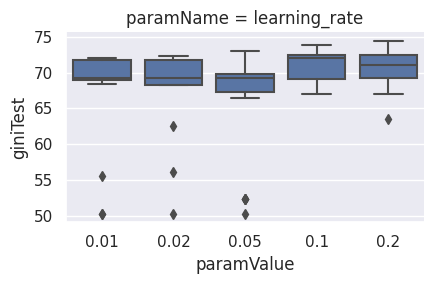

In [ ]:
pdResults = pdResults[~pdResults.paramName.isin(['objective', 'eval_metric', 'eta'])]
set(pdResults['paramName'])


sns.FacetGrid(pdResults.loc[pdResults.paramName=='learning_rate'],
              row="paramName", 
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


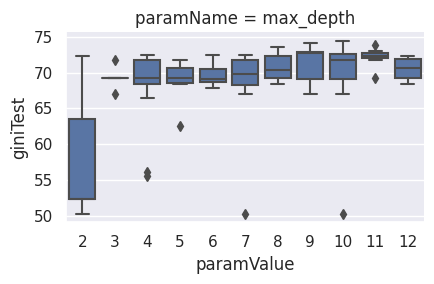

In [ ]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='max_depth'],
              row="paramName", 
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


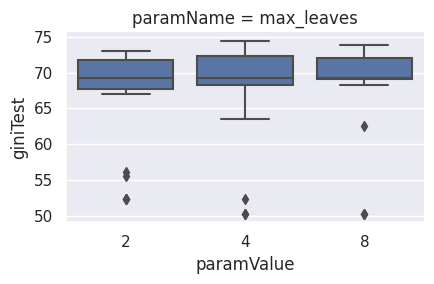

In [ ]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='max_leaves'],
              row="paramName", 
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


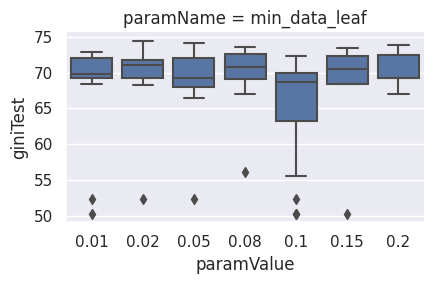

In [ ]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='min_data_leaf'],
              row="paramName", 
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


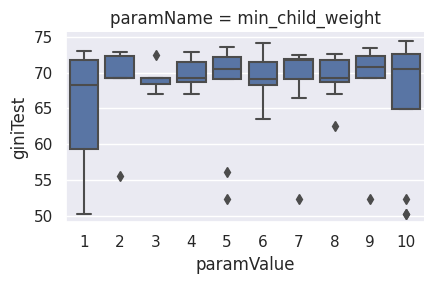

In [ ]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='min_child_weight'],
              row="paramName", 
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

# Xbost optimizado

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    train_size = 0.6,
                                                    random_state = 22)

X_watch, X_test, y_watch, y_test = train_test_split(X_test, y_test, 
                                                    stratify = y_test,
                                                    train_size = 0.5,
                                                    random_state = 22)

In [ ]:
# Creando objetos de la clase DMatrix, para poder ser usada en xgboost
dtrain = xgb.DMatrix(X_train, label = y_train)
dwatch = xgb.DMatrix(X_watch, label = y_watch)
dtest  = xgb.DMatrix(X_test, label = y_test)

In [ ]:
# Definiendo parámetros

param = {'objetive' : 'binary_logistic',
         'max_depth' : 9,
         'learning_rate': 0.1,
         'min_data_leaf' : 0.08,
         'grow_policy' : 'lossguide',
         'seed' : 22}

param['eval_metric'] = 'auc'
num_round = 300         
evallist = [(dtrain,'train'), (dwatch,'watchlist')]

In [ ]:
import time

start_time = time.time()
xgBoost = xgb.train(param, dtrain, num_round, evallist, 
                    early_stopping_rounds = 5)
print("----%s seconds ---" % ((time.time() - start_time)))

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[05:41:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_data_leaf", "objetive" } are not used.

[0]	train-auc:0.84904	watchlist-auc:0.84981
[1]	train-auc:0.85258	watchlist-auc:0.85252
[2]	train-auc:0.85677	watchlist-auc:0.85676
[3]	train-auc:0.85889	watchlist-auc:0.85893
[4]	train-auc:0.86130	watchlist-auc:0.86215
[5]	train-auc:0.86379	watchlist-auc:0.86451
[6]	train-auc:0.86522	watchlist-auc:0.86555
[7]	train-auc:0.86699	watchlist-auc:0.86677
[8]	train-auc:0.86792	watchlist-auc:0.86776
[9]	train-auc:0.86991	watchlist-auc:0.86958
[10]	train-auc:0.87090	watchlist-auc:0.87026
[11]	train-auc:0.87179	watchlist-auc:0.87061
[12]	train-auc:0.87283	watchlist-auc:0.87126
[13]	train-auc:0.87417	watchlist-auc:0.87176
[14]	train-auc:0.87507	watchlist-auc:0.87223
[15]	train-auc:0.87572	watchlist-auc:0.87252
[16]	train-auc:0.87733	watchlist-auc:0.87310
[17]	train-auc:0.87909	watchlist-auc:0.87400
[18]	train-auc:0.88072	watchlist-auc:0.87477
[19]	train-auc:0.88226	watchlist-auc:0.87555
[20]	tr

In [ ]:
# Usando el modelo para predecir

X_train['probability']  = xgBoost.predict(xgb.DMatrix(X_train[features], label = y_train))
X_test['probability'] = xgBoost.predict(xgb.DMatrix(X_test[features], label = y_test))

X_train['prediction']  = X_train.probability.apply(lambda x: 1 if x > 0.5 else 0)
X_test['prediction'] = X_test.probability.apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsXGB_f = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'xgb_train_f':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'xgb_test_f':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsXGB_f
metricsRes_f = pd.merge(metricsXGB,metricsXGB_f, on = 'metric', how='left') 
metricsRes_f       

,metric,xgb_train,xgb_test,xgb_train_f,xgb_test_f
0,AUC,0.888213,0.874409,0.921456,0.876020
1,Gini,0.776427,0.748818,0.842911,0.752040
2,Accuracy,0.887446,0.887469,0.901191,0.889352
3,Precision,0.957902,0.942444,0.976482,0.933076
4,Recall,0.568257,0.578739,0.613838,0.593614
5,F1-score,0.713339,0.717112,0.753813,0.725605
